# 1. 최적화

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 최적화 알고리즘(Optimizer)

기울어진 방향으로 조금씩 이동하는 코드를 구현함

#### 1. SGD

In [2]:
class SGD:
    # learning rate 변수 설정
    def __init__(self, lr=0.01):
        self.lr = lr
    
    # params는 기존의 W(Weight), B(Bias)값이 담겨있음
    # 그 값의 기울기(gradient) 값은 grads에 담겨있음
    
    def update(self, params, grads):
        for key in params.keys():
    # 그래서 params에서 key 로 조회한 값을(parameter)
    # 기울기에서 학습률만큼 빼서 갱신해줌
            params[key] -= self.lr * grads[key]

* 이런 식으로 학습 진행
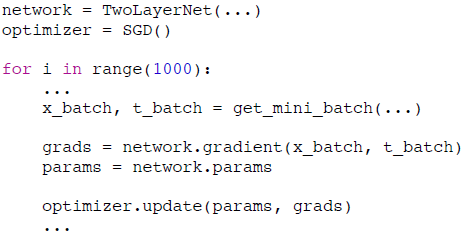

#### 2. Momentum

In [3]:
class Momentum:
    # 초기 변수 설정(learning rate, momentum, v(속도))
    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        # momentum은 속도가 차츰 감소하도록 곱해주는 값
        self.momentum = momentum
        self.v = None
        
    def update(self, param, grad):
        # 초기값 설정 dict로 선언하고
        if self.v is None:
            self.v = {}
        # 이전 가중치가 담겨있던 param을 그대로 물려받을 수 있도록
        # zero 로 채워주기
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)

        for key in params.keys():
            self.v[key] = self.momentum * self.v[key] - self.lr * grads[key]
            params[key] += self.v[key]

#### 3. AdaGrad

In [4]:
class AdaGrad:

    def __init__(self, lr=0.01):
        # 변수 설정
        self.lr = lr
        self.h = None
        
    def update(self, params, grads):
        # 가장 처음 설정
        if self.h is None:
            self.h = {}
            
            # h의 모양을 가중치의 모양하고 동일하게
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)
            
        for key in params.keys():
            self.h[key] += grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)
        # 1e-7은 분모가 0이 되는 것을 방지

#### 4. Adam

In [5]:
class Adam:

    def __init__(self, lr=0.001, beta1=0.9, beta2=0.999):
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.iter = 0
        self.m = None
        self.v = None
        
    def update(self, params, grads):
        if self.m is None:
            self.m, self.v = {}, {}
            for key, val in params.items():
                self.m[key] = np.zeros_like(val)
                self.v[key] = np.zeros_like(val)
        
        self.iter += 1
        lr_t  = self.lr * np.sqrt(1.0 - self.beta2**self.iter) / (1.0 - self.beta1**self.iter)         
        
        for key in params.keys():
            #self.m[key] = self.beta1*self.m[key] + (1-self.beta1)*grads[key]
            #self.v[key] = self.beta2*self.v[key] + (1-self.beta2)*(grads[key]**2)
            self.m[key] += (1 - self.beta1) * (grads[key] - self.m[key])
            self.v[key] += (1 - self.beta2) * (grads[key]**2 - self.v[key])
            
            params[key] -= lr_t * self.m[key] / (np.sqrt(self.v[key]) + 1e-7)
            
            #unbias_m += (1 - self.beta1) * (grads[key] - self.m[key]) # correct bias
            #unbisa_b += (1 - self.beta2) * (grads[key]*grads[key] - self.v[key]) # correct bias
            #params[key] += self.lr * unbias_m / (np.sqrt(unbisa_b) + 1e-7)


#### 참고 Nesterov, RMSprop

In [6]:
class Nesterov:

    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None
        
    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)
            
        for key in params.keys():
            self.v[key] *= self.momentum
            self.v[key] -= self.lr * grads[key]
            params[key] += self.momentum * self.momentum * self.v[key]
            params[key] -= (1 + self.momentum) * self.lr * grads[key]


In [7]:
# RMSprop

class RMSprop:

    def __init__(self, lr=0.01, decay_rate = 0.99):
        self.lr = lr
        self.decay_rate = decay_rate
        self.h = None
        
    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)
            
        for key in params.keys():
            self.h[key] *= self.decay_rate
            self.h[key] += (1 - self.decay_rate) * grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)


# 2. 가중치의 초깃값

In [8]:
# 필요 함수

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def ReLU(x):
    return np.maximum(0, x)

def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T 

    x = x - np.max(x)
    return np.exp(x) / np.sum(np.exp(x))

def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    if t.size == y.size:
        t = t.argmax(axis=1)
             
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size


##### 1. 가중치 초깃값 (표준편차 1, 0.01일때)

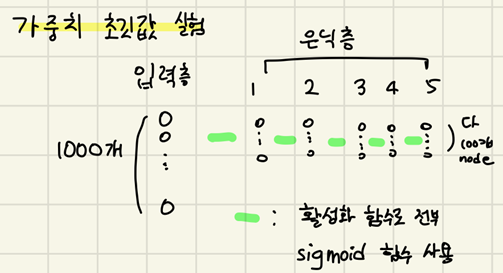

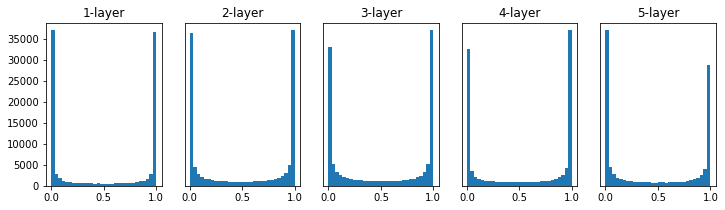

In [9]:
# 1000개의 데이터, 노드는 100개짜리 input layer
x = input_data = np.random.randn(1000, 100)
node_num = 100
# 은닉층 개수 5개
hidden_layer_size = 5
# activations 초기화
activations = {}

# 은닉층 개수(5개)만큼 반복
for i in range(hidden_layer_size):

    # 첫 반복에서는 랜덤한 w만들어서
    # 활성화 함수인 sigmoid 통과한 값을 activations 0번째에 저장(@)
    # 두번째 반복에서는 그 값(@)을 x에 넣어서
    # 다시 활성화 함수 통과 후 activations 1번째에 저장
    # 반복
    
    if i != 0:
        x = activations[i-1]

    w = np.random.randn(node_num, node_num) * 1

    a = np.dot(x, w)
    
    z = sigmoid(a)

    activations[i] = z

plt.figure(figsize=(12,3))
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

* 표준편차 1인 정규분포 -> 0과 1에 치우쳐서 분포
* 기울기 소실 문제

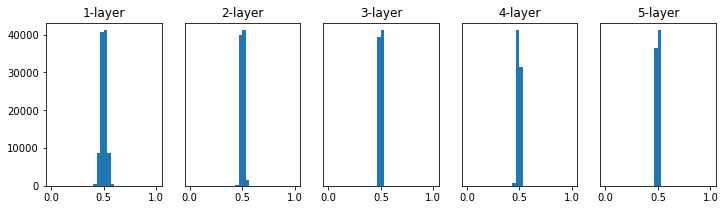

In [10]:
#위에서 표준편차만 0.01로 변경
x = input_data = np.random.randn(1000, 100)
node_num = 100
hidden_layer_size = 5
activations = {}

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = np.random.randn(node_num, node_num) * 0.01

    a = np.dot(x, w)

    z = sigmoid(a)

    activations[i] = z

plt.figure(figsize=(12,3))    
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

* 표준편차 0.01인 정규분포 -> 0.5에 치우쳐서 분포
* 표현력 관점 문제

#### 2. Xavier 초깃값

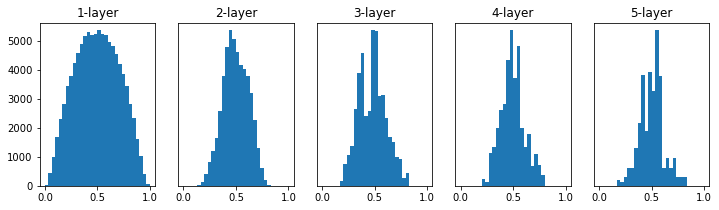

In [11]:
# 위에서 표준편차를 1/sqrt(node_num)으로 변경

x = input_data = np.random.randn(1000, 100)
node_num = 100
hidden_layer_size = 5
activations = {}

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = np.random.randn(node_num, node_num) / np.sqrt(node_num)
    
    a = np.dot(x, w)

    z = sigmoid(a)

    activations[i] = z

plt.figure(figsize=(12,3))
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

#### 3. 활성화 함수 tanh로 변경

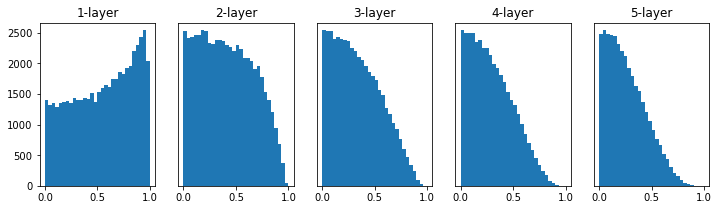

In [12]:
# 위에서 활성화 함수만 simoid에서 tanh로 변경)

x = input_data = np.random.randn(1000, 100)
node_num = 100
hidden_layer_size = 5
activations = {}

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = np.random.randn(node_num, node_num) / np.sqrt(node_num)
    
    a = np.dot(x, w)

    z = np.tanh(a)

    activations[i] = z

    
plt.figure(figsize=(12,3))
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

#### 4. He 초깃값 - ReLU 특화

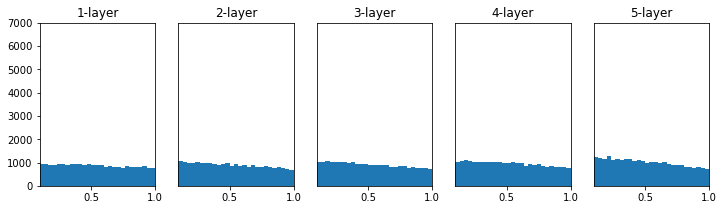

In [13]:
# He 초깃값 위에서 표준편차만 sqrt(2/node_num)으로 변경)

x = input_data = np.random.randn(1000, 100)
node_num = 100
hidden_layer_size = 5
activations = {}

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)

    a = np.dot(x, w)

    z = ReLU(a)

    activations[i] = z

plt.figure(figsize=(12,3))    
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    plt.xlim(0.1, 1)
    plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

# 3. 배치 정규화

In [9]:
# 6.8 MNIST Dataset

from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

X = X.values.astype(np.float) / 255.
y = y.values.astype(np.uint8)

x_train = X[:60000]
x_test = X[60000:]
t_train = y[:60000]
t_test = y[60000:]

print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

C:\Users\cdlee\AppData\Local\Temp/ipykernel_8008/1543906055.py:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X = X.values.astype(np.float) / 255.


(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [10]:
# 레이어 클래스

class Sigmoid:
    def __init__(self):
        self.out = None

    def forward(self, x):
        out = sigmoid(x)
        self.out = out
        return out

    def backward(self, dout):
        dx = dout * (1.0 - self.out) * self.out

        return dx
    
    
class Relu:
    def __init__(self):
        self.mask = None

    def forward(self, x):
        self.mask = (x <= 0)
        out = x.copy()
        out[self.mask] = 0

        return out

    def backward(self, dout):
        dout[self.mask] = 0
        dx = dout

        return dx
    

class Affine:
    def __init__(self, W, b):
        self.W =W
        self.b = b
        
        self.x = None
        self.original_x_shape = None

        self.dW = None
        self.db = None

    def forward(self, x):

        self.original_x_shape = x.shape
        x = x.reshape(x.shape[0], -1)
        self.x = x

        out = np.dot(self.x, self.W) + self.b

        return out

    def backward(self, dout):
        dx = np.dot(dout, self.W.T)
        self.dW = np.dot(self.x.T, dout)
        self.db = np.sum(dout, axis=0)
        
        dx = dx.reshape(*self.original_x_shape)
        return dx    
    

class BatchNormalization:

    def __init__(self, gamma, beta, momentum=0.9, running_mean=None, running_var=None):
        self.gamma = gamma
        self.beta = beta
        self.momentum = momentum
        self.input_shape = None 

        self.running_mean = running_mean
        self.running_var = running_var  
        
        self.batch_size = None
        self.xc = None
        self.std = None
        self.dgamma = None
        self.dbeta = None

    def forward(self, x, train_flg=True):
        self.input_shape = x.shape
        if x.ndim != 2:
            N, C, H, W = x.shape
            x = x.reshape(N, -1)

        out = self.__forward(x, train_flg)
        
        return out.reshape(*self.input_shape)
            
    def __forward(self, x, train_flg):
        if self.running_mean is None:
            N, D = x.shape
            self.running_mean = np.zeros(D)
            self.running_var = np.zeros(D)
                        
        if train_flg:
            mu = x.mean(axis=0)
            xc = x - mu
            var = np.mean(xc**2, axis=0)
            std = np.sqrt(var + 10e-7)
            xn = xc / std
            
            self.batch_size = x.shape[0]
            self.xc = xc
            self.xn = xn
            self.std = std
            self.running_mean = self.momentum * self.running_mean + (1-self.momentum) * mu
            self.running_var = self.momentum * self.running_var + (1-self.momentum) * var            
        else:
            xc = x - self.running_mean
            xn = xc / ((np.sqrt(self.running_var + 10e-7)))
            
        out = self.gamma * xn + self.beta 
        return out

    def backward(self, dout):
        if dout.ndim != 2:
            N, C, H, W = dout.shape
            dout = dout.reshape(N, -1)

        dx = self.__backward(dout)

        dx = dx.reshape(*self.input_shape)
        return dx

    def __backward(self, dout):
        dbeta = dout.sum(axis=0)
        dgamma = np.sum(self.xn * dout, axis=0)
        dxn = self.gamma * dout
        dxc = dxn / self.std
        dstd = -np.sum((dxn * self.xc) / (self.std * self.std), axis=0)
        dvar = 0.5 * dstd / self.std
        dxc += (2.0 / self.batch_size) * self.xc * dvar
        dmu = np.sum(dxc, axis=0)
        dx = dxc - dmu / self.batch_size
        
        self.dgamma = dgamma
        self.dbeta = dbeta
        
        return dx
    

class SoftmaxWithLoss:
    def __init__(self):
        self.loss = None
        self.y = None
        self.t = None

    def forward(self, x, t):
        self.t = t
        self.y = softmax(x)
        self.loss = cross_entropy_error(self.y, self.t)
        
        return self.loss

    def backward(self, dout=1):
        batch_size = self.t.shape[0]
        if self.t.size == self.y.size:
            dx = (self.y - self.t) / batch_size
        else:
            dx = self.y.copy()
            dx[np.arange(batch_size), self.t] -= 1
            dx = dx / batch_size
        
        return dx
    



In [11]:
# MultiLayerNet

from collections import OrderedDict

class MultiLayerNet:
    """
    Weight Decay, Dropout,Batch Normalization

    Parameters
    ----------
    input_size : 입력 노드 갯수
    hidden_size_list : 은닉층 노드 갯수 리스트 （e.g. [100, 100, 100]）
    output_size : 출력 노드 갯수
    activation : 'relu' or 'sigmoid'
    weight_init_std : 초깃값 표준편차 （e.g. 0.01）
        'relu' 또는 'he'를 지정할 경우 he 초깃값 설정
        'sigmoid' 또는 'xavier'를 지정할 경우 xavier 초깃값 설정
    weight_decay_lambda : Weight Decay（L2 norm）
    use_dropout: Dropout 사용 여부
    dropout_ratio : Dropout 비율
    use_batchNorm: Batch Normalization 사용 여부
    """

    def __init__(self, input_size, hidden_size_list, output_size,
                 activation='relu', weight_init_std='relu', weight_decay_lambda=0, 
                 use_dropout = False, dropout_ratio = 0.5, use_batchnorm=False):
        
        # 파라미터 저장
        self.input_size = input_size
        self.output_size = output_size
        self.hidden_size_list = hidden_size_list
        self.hidden_layer_num = len(hidden_size_list)
        self.use_dropout = use_dropout
        self.weight_decay_lambda = weight_decay_lambda
        self.use_batchnorm = use_batchnorm

        # 가중치 초기화        
        self.params = {}
        all_size_list = [self.input_size] + self.hidden_size_list + [self.output_size]
        for idx in range(1, len(all_size_list)):
            scale = weight_init_std
            # 만약 weight_init_std가 relu나 he일 경우
            if str(weight_init_std).lower() in ('relu', 'he'):
                # He 초깃값 적용
                scale = np.sqrt(2.0 / all_size_list[idx - 1])
            # 만약 weight_init_std가 sigmoid나 zavier의 경우
            elif str(weight_init_std).lower() in ('sigmoid', 'xavier'):
                # Xavier 초깃값 적용
                scale = np.sqrt(1.0 / all_size_list[idx - 1])
            # 가중치 초기화
            self.params['W' + str(idx)] = scale * np.random.randn(all_size_list[idx-1], all_size_list[idx])
            self.params['b' + str(idx)] = np.zeros(all_size_list[idx])

        # layers 초기화
        activation_layer = {'sigmoid': Sigmoid, 'relu': Relu}
        self.layers = OrderedDict()
        for idx in range(1, self.hidden_layer_num+1):

            # Affine layer
            self.layers['Affine' + str(idx)] = Affine(self.params['W' + str(idx)],
                                                      self.params['b' + str(idx)])
            # Batch normalization 사용하는 경우
            if self.use_batchnorm:
                self.params['gamma' + str(idx)] = np.ones(hidden_size_list[idx-1])
                self.params['beta' + str(idx)] = np.zeros(hidden_size_list[idx-1])
                self.layers['BatchNorm' + str(idx)] = BatchNormalization(self.params['gamma' + str(idx)], self.params['beta' + str(idx)])
            
            # 활성화 함수 layer
            self.layers['Activation_function' + str(idx)] = activation_layer[activation]()
            
            # Dropout
            if self.use_dropout:
                self.layers['Dropout' + str(idx)] = Dropout(dropout_ratio)

        # 마지막 Affine layer
        idx = self.hidden_layer_num + 1
        self.layers['Affine' + str(idx)] = Affine(self.params['W' + str(idx)], self.params['b' + str(idx)])

        # SoftmaxWithLoss layer
        self.last_layer = SoftmaxWithLoss()


    def predict(self, x, train_flg=False):
        # 모든 layer에 대해서 순차적으로 forward
        for key, layer in self.layers.items():
            # Dropout과 BatchNorm의 경우, train과 test를 다르게 처리
            if "Dropout" in key or "BatchNorm" in key:
                x = layer.forward(x, train_flg)
            else:
                x = layer.forward(x)

        return x

    def loss(self, x, t, train_flg=False):
        # 순전파
        y = self.predict(x, train_flg)

        # Weight decay
        weight_decay = 0
        for idx in range(1, self.hidden_layer_num + 2):
            W = self.params['W' + str(idx)]
            weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)

        return self.last_layer.forward(y, t) + weight_decay

    def accuracy(self, X, T):
        # 순전파
        Y = self.predict(X, train_flg=False)
        # 출력값 중 가장 큰 값의 인덱스
        Y = np.argmax(Y, axis=1)
        # 정답 인덱스
        if T.ndim != 1 : 
            T = np.argmax(T, axis=1)
        # 정확도 
        accuracy = np.sum(Y == T) / float(X.shape[0])
        return accuracy

       
    def gradient(self, x, t):
        # 순전파
        self.loss(x, t, train_flg=True)

        # 모든 layer에 대해서 역전파
        dout = 1
        dout = self.last_layer.backward(dout)

        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        # 구해진 기울기를 grads에 저장 후 return
        grads = {}
        for idx in range(1, self.hidden_layer_num+2):
            grads['W' + str(idx)] = self.layers['Affine' + str(idx)].dW + self.weight_decay_lambda * self.params['W' + str(idx)]
            grads['b' + str(idx)] = self.layers['Affine' + str(idx)].db

            if self.use_batchnorm and idx != self.hidden_layer_num+1:
                grads['gamma' + str(idx)] = self.layers['BatchNorm' + str(idx)].dgamma
                grads['beta' + str(idx)] = self.layers['BatchNorm' + str(idx)].dbeta

        return grads

#### 배치 정규화 사용 차이 보기 위해서

In [12]:
# train 함수 정의
x_train1 = x_train[:1000]
t_train1 = t_train[:1000]

max_epochs = 20
train_size = x_train1.shape[0]
batch_size = 100
learning_rate = 0.01

def _train(weight_init_std):
    # batch normalization 사용하는 신경망
    bn_network = MultiLayerNet(input_size=784, 
                                hidden_size_list=[100, 100, 100, 100, 100], 
                                output_size=10, weight_init_std=weight_init_std, use_batchnorm=True)
    
    # batch normalization 사용하지 않는 신경망
    network = MultiLayerNet(input_size=784, 
                             hidden_size_list=[100, 100, 100, 100, 100], 
                             output_size=10, weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)
    
    train_acc_list = []
    bn_train_acc_list = []
    
    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0
    
    for i in range(1000000000):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train1[batch_mask]
        t_batch = t_train1[batch_mask]
    
        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)
    
        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train1, t_train1)
            bn_train_acc = bn_network.accuracy(x_train1, t_train1)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)
    
            print("epoch:" + str(epoch_cnt) + " | " + str(train_acc) + " - " + str(bn_train_acc))
    
            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break
                
    return train_acc_list, bn_train_acc_list

============== 1/16 ==============
epoch:0 | 0.116 - 0.1
epoch:1 | 0.097 - 0.096
epoch:2 | 0.097 - 0.112


C:\Users\cdlee\AppData\Local\Temp/ipykernel_17732/173028171.py:102: RuntimeWarning: overflow encountered in square
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
C:\Users\cdlee\AppData\Local\Temp/ipykernel_17732/173028171.py:102: RuntimeWarning: invalid value encountered in double_scalars
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)


epoch:3 | 0.097 - 0.139
epoch:4 | 0.097 - 0.167
epoch:5 | 0.097 - 0.172
epoch:6 | 0.097 - 0.189
epoch:7 | 0.097 - 0.21
epoch:8 | 0.097 - 0.224
epoch:9 | 0.097 - 0.247
epoch:10 | 0.097 - 0.278
epoch:11 | 0.097 - 0.299
epoch:12 | 0.097 - 0.317
epoch:13 | 0.097 - 0.321
epoch:14 | 0.097 - 0.344
epoch:15 | 0.097 - 0.36
epoch:16 | 0.097 - 0.385


No handles with labels found to put in legend.


epoch:17 | 0.097 - 0.402
epoch:18 | 0.097 - 0.405
epoch:19 | 0.097 - 0.408
============== 2/16 ==============
epoch:0 | 0.087 - 0.114


C:\Users\cdlee\AppData\Local\Temp/ipykernel_17732/173028171.py:102: RuntimeWarning: overflow encountered in square
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
C:\Users\cdlee\AppData\Local\Temp/ipykernel_17732/173028171.py:102: RuntimeWarning: invalid value encountered in double_scalars
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


epoch:1 | 0.097 - 0.093
epoch:2 | 0.097 - 0.132
epoch:3 | 0.097 - 0.146
epoch:4 | 0.097 - 0.169
epoch:5 | 0.097 - 0.179
epoch:6 | 0.097 - 0.202
epoch:7 | 0.097 - 0.227
epoch:8 | 0.097 - 0.238
epoch:9 | 0.097 - 0.258
epoch:10 | 0.097 - 0.285
epoch:11 | 0.097 - 0.308
epoch:12 | 0.097 - 0.33
epoch:13 | 0.097 - 0.35
epoch:14 | 0.097 - 0.375
epoch:15 | 0.097 - 0.386
epoch:16 | 0.097 - 0.408


No handles with labels found to put in legend.


epoch:17 | 0.097 - 0.422
epoch:18 | 0.097 - 0.435
epoch:19 | 0.097 - 0.457
============== 3/16 ==============
epoch:0 | 0.173 - 0.085
epoch:1 | 0.412 - 0.094
epoch:2 | 0.535 - 0.132
epoch:3 | 0.638 - 0.169
epoch:4 | 0.718 - 0.223
epoch:5 | 0.751 - 0.249
epoch:6 | 0.813 - 0.281
epoch:7 | 0.835 - 0.32
epoch:8 | 0.88 - 0.37
epoch:9 | 0.909 - 0.398
epoch:10 | 0.927 - 0.428
epoch:11 | 0.951 - 0.461
epoch:12 | 0.957 - 0.475
epoch:13 | 0.962 - 0.509
epoch:14 | 0.973 - 0.533
epoch:15 | 0.978 - 0.556
epoch:16 | 0.983 - 0.572
epoch:17 | 0.986 - 0.593
epoch:18 | 0.988 - 0.607


No handles with labels found to put in legend.


epoch:19 | 0.988 - 0.62
============== 4/16 ==============
epoch:0 | 0.113 - 0.106
epoch:1 | 0.263 - 0.124
epoch:2 | 0.426 - 0.181
epoch:3 | 0.531 - 0.252
epoch:4 | 0.605 - 0.321
epoch:5 | 0.645 - 0.381
epoch:6 | 0.683 - 0.429
epoch:7 | 0.728 - 0.473
epoch:8 | 0.755 - 0.521
epoch:9 | 0.775 - 0.561
epoch:10 | 0.79 - 0.594
epoch:11 | 0.796 - 0.609
epoch:12 | 0.811 - 0.65
epoch:13 | 0.82 - 0.668
epoch:14 | 0.821 - 0.679
epoch:15 | 0.839 - 0.705
epoch:16 | 0.85 - 0.718
epoch:17 | 0.851 - 0.733


No handles with labels found to put in legend.


epoch:18 | 0.855 - 0.747
epoch:19 | 0.861 - 0.755
============== 5/16 ==============
epoch:0 | 0.075 - 0.091
epoch:1 | 0.085 - 0.122
epoch:2 | 0.098 - 0.26
epoch:3 | 0.113 - 0.388
epoch:4 | 0.126 - 0.507
epoch:5 | 0.136 - 0.592
epoch:6 | 0.146 - 0.646
epoch:7 | 0.155 - 0.696
epoch:8 | 0.157 - 0.728
epoch:9 | 0.16 - 0.754
epoch:10 | 0.164 - 0.778
epoch:11 | 0.161 - 0.802
epoch:12 | 0.171 - 0.82
epoch:13 | 0.174 - 0.833
epoch:14 | 0.183 - 0.843
epoch:15 | 0.189 - 0.856
epoch:16 | 0.194 - 0.862
epoch:17 | 0.202 - 0.875
epoch:18 | 0.205 - 0.883


No handles with labels found to put in legend.


epoch:19 | 0.212 - 0.891
============== 6/16 ==============
epoch:0 | 0.115 - 0.128
epoch:1 | 0.157 - 0.248
epoch:2 | 0.2 - 0.468
epoch:3 | 0.152 - 0.582
epoch:4 | 0.121 - 0.643
epoch:5 | 0.121 - 0.708
epoch:6 | 0.125 - 0.744
epoch:7 | 0.118 - 0.78
epoch:8 | 0.148 - 0.805
epoch:9 | 0.117 - 0.821
epoch:10 | 0.117 - 0.844
epoch:11 | 0.117 - 0.859
epoch:12 | 0.117 - 0.879
epoch:13 | 0.117 - 0.887
epoch:14 | 0.192 - 0.898
epoch:15 | 0.117 - 0.909
epoch:16 | 0.137 - 0.92
epoch:17 | 0.173 - 0.927
epoch:18 | 0.154 - 0.937


No handles with labels found to put in legend.


epoch:19 | 0.166 - 0.946
============== 7/16 ==============
epoch:0 | 0.088 - 0.105
epoch:1 | 0.117 - 0.402
epoch:2 | 0.117 - 0.59
epoch:3 | 0.117 - 0.642
epoch:4 | 0.117 - 0.709
epoch:5 | 0.117 - 0.757
epoch:6 | 0.117 - 0.793
epoch:7 | 0.117 - 0.819
epoch:8 | 0.117 - 0.858
epoch:9 | 0.117 - 0.89
epoch:10 | 0.117 - 0.913
epoch:11 | 0.117 - 0.934
epoch:12 | 0.117 - 0.945
epoch:13 | 0.117 - 0.96
epoch:14 | 0.117 - 0.966
epoch:15 | 0.117 - 0.975
epoch:16 | 0.117 - 0.983
epoch:17 | 0.117 - 0.985


No handles with labels found to put in legend.


epoch:18 | 0.117 - 0.989
epoch:19 | 0.117 - 0.992
============== 8/16 ==============
epoch:0 | 0.105 - 0.101
epoch:1 | 0.116 - 0.437
epoch:2 | 0.116 - 0.719
epoch:3 | 0.117 - 0.786
epoch:4 | 0.117 - 0.824
epoch:5 | 0.117 - 0.884
epoch:6 | 0.117 - 0.916
epoch:7 | 0.117 - 0.94
epoch:8 | 0.117 - 0.958
epoch:9 | 0.117 - 0.975
epoch:10 | 0.117 - 0.984
epoch:11 | 0.117 - 0.991
epoch:12 | 0.117 - 0.99
epoch:13 | 0.117 - 0.996
epoch:14 | 0.117 - 0.997
epoch:15 | 0.117 - 0.998
epoch:16 | 0.117 - 0.998


No handles with labels found to put in legend.


epoch:17 | 0.117 - 0.999
epoch:18 | 0.117 - 0.998
epoch:19 | 0.117 - 0.998
============== 9/16 ==============
epoch:0 | 0.092 - 0.135
epoch:1 | 0.117 - 0.476
epoch:2 | 0.117 - 0.706
epoch:3 | 0.117 - 0.793
epoch:4 | 0.117 - 0.849
epoch:5 | 0.116 - 0.882
epoch:6 | 0.117 - 0.896
epoch:7 | 0.117 - 0.93
epoch:8 | 0.117 - 0.983
epoch:9 | 0.117 - 0.991
epoch:10 | 0.117 - 0.994
epoch:11 | 0.117 - 0.997
epoch:12 | 0.117 - 1.0
epoch:13 | 0.117 - 1.0
epoch:14 | 0.117 - 1.0
epoch:15 | 0.117 - 1.0
epoch:16 | 0.117 - 1.0


No handles with labels found to put in legend.


epoch:17 | 0.117 - 1.0
epoch:18 | 0.117 - 1.0
epoch:19 | 0.117 - 1.0
============== 10/16 ==============
epoch:0 | 0.1 - 0.097
epoch:1 | 0.1 - 0.444
epoch:2 | 0.117 - 0.777
epoch:3 | 0.117 - 0.843
epoch:4 | 0.117 - 0.831
epoch:5 | 0.117 - 0.944
epoch:6 | 0.117 - 0.959
epoch:7 | 0.117 - 0.981
epoch:8 | 0.117 - 0.979
epoch:9 | 0.116 - 0.982
epoch:10 | 0.116 - 0.992
epoch:11 | 0.116 - 0.993
epoch:12 | 0.116 - 0.995
epoch:13 | 0.116 - 0.996
epoch:14 | 0.116 - 0.997
epoch:15 | 0.116 - 0.998
epoch:16 | 0.116 - 0.998


No handles with labels found to put in legend.


epoch:17 | 0.116 - 0.999
epoch:18 | 0.116 - 0.998
epoch:19 | 0.116 - 0.999
============== 11/16 ==============
epoch:0 | 0.093 - 0.155
epoch:1 | 0.117 - 0.681
epoch:2 | 0.117 - 0.699
epoch:3 | 0.117 - 0.679
epoch:4 | 0.117 - 0.732
epoch:5 | 0.117 - 0.791
epoch:6 | 0.117 - 0.798
epoch:7 | 0.117 - 0.831
epoch:8 | 0.117 - 0.839
epoch:9 | 0.117 - 0.882
epoch:10 | 0.117 - 0.898
epoch:11 | 0.117 - 0.965
epoch:12 | 0.117 - 0.986
epoch:13 | 0.117 - 0.974
epoch:14 | 0.117 - 0.961
epoch:15 | 0.117 - 0.99
epoch:16 | 0.117 - 0.992
epoch:17 | 0.117 - 0.993


No handles with labels found to put in legend.


epoch:18 | 0.117 - 0.989
epoch:19 | 0.117 - 0.977
============== 12/16 ==============
epoch:0 | 0.116 - 0.122
epoch:1 | 0.116 - 0.517
epoch:2 | 0.116 - 0.638
epoch:3 | 0.116 - 0.625
epoch:4 | 0.116 - 0.713
epoch:5 | 0.116 - 0.762
epoch:6 | 0.116 - 0.766
epoch:7 | 0.117 - 0.761
epoch:8 | 0.117 - 0.791
epoch:9 | 0.117 - 0.758
epoch:10 | 0.117 - 0.829
epoch:11 | 0.117 - 0.778
epoch:12 | 0.116 - 0.788
epoch:13 | 0.116 - 0.797
epoch:14 | 0.117 - 0.796
epoch:15 | 0.117 - 0.798
epoch:16 | 0.117 - 0.801
epoch:17 | 0.117 - 0.798
epoch:18 | 0.117 - 0.801


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.832
============== 13/16 ==============
epoch:0 | 0.092 - 0.236
epoch:1 | 0.116 - 0.446
epoch:2 | 0.116 - 0.49
epoch:3 | 0.116 - 0.505
epoch:4 | 0.116 - 0.556
epoch:5 | 0.116 - 0.534
epoch:6 | 0.116 - 0.545
epoch:7 | 0.116 - 0.598
epoch:8 | 0.116 - 0.604
epoch:9 | 0.116 - 0.581
epoch:10 | 0.116 - 0.615
epoch:11 | 0.116 - 0.615
epoch:12 | 0.116 - 0.54
epoch:13 | 0.116 - 0.614
epoch:14 | 0.116 - 0.615
epoch:15 | 0.116 - 0.607
epoch:16 | 0.116 - 0.613
epoch:17 | 0.116 - 0.62
epoch:18 | 0.116 - 0.606


No handles with labels found to put in legend.


epoch:19 | 0.116 - 0.598
============== 14/16 ==============
epoch:0 | 0.097 - 0.097
epoch:1 | 0.116 - 0.342
epoch:2 | 0.116 - 0.386
epoch:3 | 0.116 - 0.347
epoch:4 | 0.116 - 0.406
epoch:5 | 0.116 - 0.433
epoch:6 | 0.116 - 0.434
epoch:7 | 0.116 - 0.439
epoch:8 | 0.116 - 0.428
epoch:9 | 0.116 - 0.437
epoch:10 | 0.116 - 0.419
epoch:11 | 0.116 - 0.421
epoch:12 | 0.117 - 0.426
epoch:13 | 0.117 - 0.432
epoch:14 | 0.117 - 0.423
epoch:15 | 0.116 - 0.426
epoch:16 | 0.116 - 0.423
epoch:17 | 0.116 - 0.434
epoch:18 | 0.116 - 0.422


No handles with labels found to put in legend.


epoch:19 | 0.116 - 0.424
============== 15/16 ==============
epoch:0 | 0.105 - 0.112
epoch:1 | 0.117 - 0.27
epoch:2 | 0.116 - 0.356
epoch:3 | 0.117 - 0.394
epoch:4 | 0.117 - 0.401
epoch:5 | 0.117 - 0.406
epoch:6 | 0.117 - 0.413
epoch:7 | 0.117 - 0.414
epoch:8 | 0.117 - 0.417
epoch:9 | 0.117 - 0.413
epoch:10 | 0.117 - 0.416
epoch:11 | 0.117 - 0.415
epoch:12 | 0.117 - 0.414
epoch:13 | 0.117 - 0.416
epoch:14 | 0.117 - 0.518
epoch:15 | 0.117 - 0.52
epoch:16 | 0.117 - 0.521
epoch:17 | 0.117 - 0.237
epoch:18 | 0.117 - 0.409
epoch:19 | 0.117 - 0.515


No handles with labels found to put in legend.


============== 16/16 ==============
epoch:0 | 0.094 - 0.097
epoch:1 | 0.117 - 0.296
epoch:2 | 0.117 - 0.319
epoch:3 | 0.117 - 0.324
epoch:4 | 0.117 - 0.409
epoch:5 | 0.117 - 0.416
epoch:6 | 0.117 - 0.422
epoch:7 | 0.117 - 0.424
epoch:8 | 0.117 - 0.428
epoch:9 | 0.117 - 0.43
epoch:10 | 0.117 - 0.43
epoch:11 | 0.117 - 0.427
epoch:12 | 0.117 - 0.407
epoch:13 | 0.117 - 0.424
epoch:14 | 0.117 - 0.425
epoch:15 | 0.117 - 0.423
epoch:16 | 0.117 - 0.427
epoch:17 | 0.117 - 0.429
epoch:18 | 0.117 - 0.427
epoch:19 | 0.117 - 0.408


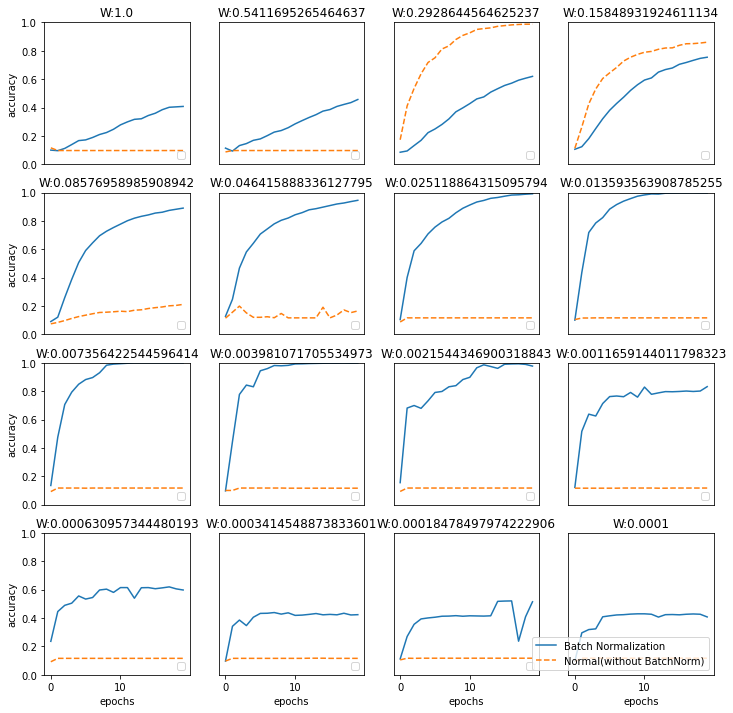

In [18]:
# 10의 0승과 -4승 사이를 16개 쪼갠 값을 weight_scale_list에 넣음
weight_scale_list = np.logspace(0, -4, num=16)
x = np.arange(max_epochs)

plt.figure(figsize=(12,12))

for i, w in enumerate(weight_scale_list):
    print( "============== " + str(i+1) + "/16" + " ==============")
    train_acc_list, bn_train_acc_list = _train(w)
    
    plt.subplot(4,4,i+1)
    plt.title("W:" + str(w))
    if i == 15:
        plt.plot(x, bn_train_acc_list, label='Batch Normalization', markevery=2)
        plt.plot(x, train_acc_list, linestyle = "--", label='Normal(without BatchNorm)', markevery=2)
    else:
        plt.plot(x, bn_train_acc_list, markevery=2)
        plt.plot(x, train_acc_list, linestyle="--", markevery=2)

    plt.ylim(0, 1.0)
    if i % 4:
        plt.yticks([])
    else:
        plt.ylabel("accuracy")
    if i < 12:
        plt.xticks([])
    else:
        plt.xlabel("epochs")
    plt.legend(loc='lower right')
    
plt.show()

# 4. Overfitting

epoch: 0, train acc: 0.10666666666666667, test acc: 0.1017
epoch: 1, train acc: 0.11, test acc: 0.1066
epoch: 2, train acc: 0.11333333333333333, test acc: 0.1099
epoch: 3, train acc: 0.13333333333333333, test acc: 0.1192
epoch: 4, train acc: 0.14666666666666667, test acc: 0.1258
epoch: 5, train acc: 0.18, test acc: 0.1393
epoch: 6, train acc: 0.20666666666666667, test acc: 0.1601
epoch: 7, train acc: 0.22, test acc: 0.1708
epoch: 8, train acc: 0.24, test acc: 0.1867
epoch: 9, train acc: 0.2633333333333333, test acc: 0.209
epoch: 10, train acc: 0.3, test acc: 0.2361
epoch: 11, train acc: 0.3466666666666667, test acc: 0.2639
epoch: 12, train acc: 0.38666666666666666, test acc: 0.286
epoch: 13, train acc: 0.38666666666666666, test acc: 0.2928
epoch: 14, train acc: 0.4, test acc: 0.3084
epoch: 15, train acc: 0.42333333333333334, test acc: 0.3318
epoch: 16, train acc: 0.42, test acc: 0.3319
epoch: 17, train acc: 0.44333333333333336, test acc: 0.3449
epoch: 18, train acc: 0.46, test acc: 0.3

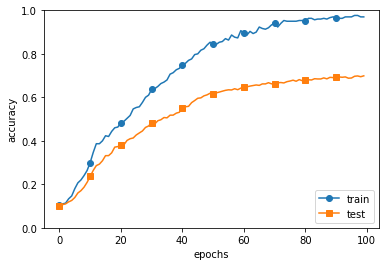

In [13]:
# 오버피팅을 확인하기 위해 Mnist 데이터 300개만 가져오기

x_train1 = x_train[:300]
t_train1 = t_train[:300]

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)
optimizer = SGD(lr=0.01)

max_epochs = 100
train_size = x_train1.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train1[batch_mask]
    t_batch = t_train1[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train1, t_train1)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print('epoch: {}, train acc: {}, test acc: {}'.format(epoch_cnt, train_acc, test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


# 그래프

markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

### Weight decay 가중치 감소

epoch: 0, train acc: 0.08666666666666667, test acc: 0.1106
epoch: 1, train acc: 0.09333333333333334, test acc: 0.1188
epoch: 2, train acc: 0.13, test acc: 0.1401
epoch: 3, train acc: 0.17, test acc: 0.1675
epoch: 4, train acc: 0.20666666666666667, test acc: 0.1889
epoch: 5, train acc: 0.24333333333333335, test acc: 0.2225
epoch: 6, train acc: 0.30666666666666664, test acc: 0.2575
epoch: 7, train acc: 0.36, test acc: 0.2805
epoch: 8, train acc: 0.38, test acc: 0.3045
epoch: 9, train acc: 0.41, test acc: 0.3211
epoch: 10, train acc: 0.42333333333333334, test acc: 0.3383
epoch: 11, train acc: 0.44, test acc: 0.3515
epoch: 12, train acc: 0.45, test acc: 0.3615
epoch: 13, train acc: 0.49, test acc: 0.3775
epoch: 14, train acc: 0.52, test acc: 0.3916
epoch: 15, train acc: 0.5366666666666666, test acc: 0.4066
epoch: 16, train acc: 0.55, test acc: 0.4192
epoch: 17, train acc: 0.55, test acc: 0.4222
epoch: 18, train acc: 0.5433333333333333, test acc: 0.427
epoch: 19, train acc: 0.56666666666666

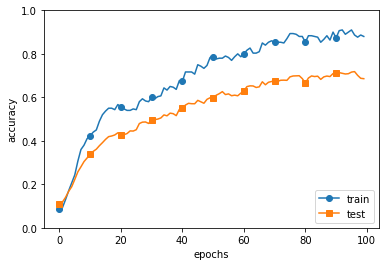

In [14]:
# Weight decay
x_train1 = x_train[:300]
t_train1 = t_train[:300]

weight_decay_lambda = 0.1

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], 
                              output_size=10, weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01)

max_epochs = 100
train_size = x_train1.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train1[batch_mask]
    t_batch = t_train1[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train1, t_train1)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print('epoch: {}, train acc: {}, test acc: {}'.format(epoch_cnt, train_acc, test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break

            
# 그래프

markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

### Dropout

In [13]:
# Trainer class

class Trainer:

    def __init__(self, network, x_train, t_train, x_test, t_test,
                 epochs=20, mini_batch_size=100,
                 optimizer='SGD', optimizer_param={'lr':0.01}, 
                 evaluate_sample_num_per_epoch=None, verbose=True):
        
        self.network = network
        self.verbose = verbose
        self.x_train = x_train
        self.t_train = t_train
        self.x_test = x_test
        self.t_test = t_test
        self.epochs = epochs
        self.batch_size = mini_batch_size
        self.evaluate_sample_num_per_epoch = evaluate_sample_num_per_epoch

        # optimizer
        optimizer_class_dict = {'sgd':SGD, 'momentum':Momentum, 'nesterov':Nesterov,
                                'adagrad':AdaGrad, 'rmsprpo':RMSprop, 'adam':Adam}
        self.optimizer = optimizer_class_dict[optimizer.lower()](**optimizer_param)
        
        self.train_size = x_train.shape[0]
        self.iter_per_epoch = max(self.train_size / mini_batch_size, 1)
        self.max_iter = int(epochs * self.iter_per_epoch)
        self.current_iter = 0
        self.current_epoch = 0
        
        self.train_loss_list = []
        self.train_acc_list = []
        self.test_acc_list = []

    def train_step(self):
        batch_mask = np.random.choice(self.train_size, self.batch_size)
        x_batch = self.x_train[batch_mask]
        t_batch = self.t_train[batch_mask]
        
        grads = self.network.gradient(x_batch, t_batch)
        self.optimizer.update(self.network.params, grads)
        
        loss = self.network.loss(x_batch, t_batch)
        self.train_loss_list.append(loss)
        if self.verbose: print("train loss:" + str(loss))
        
        if self.current_iter % self.iter_per_epoch == 0:
            self.current_epoch += 1
            
            x_train_sample, t_train_sample = self.x_train, self.t_train
            x_test_sample, t_test_sample = self.x_test, self.t_test
            if not self.evaluate_sample_num_per_epoch is None:
                t = self.evaluate_sample_num_per_epoch
                x_train_sample, t_train_sample = self.x_train[:t], self.t_train[:t]
                x_test_sample, t_test_sample = self.x_test[:t], self.t_test[:t]
                
            train_acc = self.network.accuracy(x_train_sample, t_train_sample)
            test_acc = self.network.accuracy(x_test_sample, t_test_sample)
            self.train_acc_list.append(train_acc)
            self.test_acc_list.append(test_acc)

            if self.verbose: print("=== epoch:" + str(self.current_epoch) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc) + " ===")
        self.current_iter += 1

    def train(self):
        for i in range(self.max_iter):
            self.train_step()

        test_acc = self.network.accuracy(self.x_test, self.t_test)

        if self.verbose:
            print("=============== Final Test Accuracy ===============")
            print("test acc:" + str(test_acc))



In [14]:
# Dropout

class Dropout:
    
    # dropout_ratio 초기화
    def __init__(self, dropout_ratio=0.5):
        self.dropout_ratio = dropout_ratio
        self.mask = None

    # train_flg는 훈련시 true, 예측시 false
    def forward(self, x, train_flg=True):
        if train_flg:
            print('no star')
            print(np.random.rand( 4, 5 ) > self.dropout_ratio)
            print('star')
            print(np.random.rand(*x.shape) > self.dropout_ratio)
            quit()
            
            # random.rand로 만들어지는 숫자는 정규분포를 따름
            # 그러므로 그 정규분포에서 드랍아웃 비율보다 큰 값만 활성화 할 것이다
            self.mask = np.random.rand(*x.shape) > self.dropout_ratio
            return x * self.mask
        
        # 예측 시에는 출력값 모두에 1에서 dropout 비율을 뺀 만큼 반환
        else:
            return x * (1.0 - self.dropout_ratio)

    # 역전파 때에도 dropout 된 뉴런은 신호 차단
    def backward(self, dout):
        return dout * self.mask

        

no star
[[ True False  True  True False]
 [ True False  True  True  True]
 [ True  True False  True  True]
 [ True  True  True  True  True]]
star
[[False  True  True ...  True  True  True]
 [ True  True False ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True False ...  True  True  True]
 [ True  True False ...  True False False]
 [ True  True  True ... False  True  True]]
no star
[[ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True False]
 [ True  True  True  True  True]]
star
[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True False  True]
 [ True False  True ...  True  True  True]
 ...
 [ True  True False ...  True False  True]
 [ True  True  True ...  True False  True]
 [ True  True  True ...  True  True False]]
no star
[[False  True  True False  True]
 [False  True False  True  True]
 [ True False  True  True  True]
 [ True  True False  True  True]]
star
[[ True  True  True ...  True  Tru

=== epoch:2, train acc:0.1, test acc:0.1131 ===
no star
[[ True  True  True  True  True]
 [ True  True  True  True  True]
 [False  True  True  True  True]
 [ True  True  True  True  True]]
star
[[ True  True False ...  True  True False]
 [ True  True  True ...  True  True  True]
 [False False False ...  True  True  True]
 ...
 [ True False False ...  True  True  True]
 [False  True  True ...  True False  True]
 [ True  True  True ... False  True  True]]
no star
[[ True  True  True  True  True]
 [ True False False  True  True]
 [False  True  True  True  True]
 [ True False  True  True  True]]
star
[[ True  True  True ... False  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True False]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ... False  True  True]
 [ True  True  True ...  True False  True]]
no star
[[ True  True False  True  True]
 [ True  True  True  True  True]
 [ True  True False  True  True]
 [False  True  True  True

no star
[[ True False  True False  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]]
star
[[ True  True  True ...  True False  True]
 [ True  True False ...  True  True  True]
 [False  True  True ...  True  True False]
 ...
 [ True  True  True ... False  True  True]
 [ True  True  True ...  True  True  True]
 [False False  True ...  True  True  True]]
no star
[[ True False False  True False]
 [False  True  True  True  True]
 [ True  True False  True  True]
 [ True  True  True  True  True]]
star
[[ True  True  True ...  True  True  True]
 [ True False  True ...  True  True False]
 [ True  True False ... False  True False]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [False  True False ...  True False  True]]
no star
[[ True  True False  True False]
 [ True  True  True  True  True]
 [False False  True  True  True]
 [ True  True  True  True  True]]
star
[[False  True  True ...  True  Tru

=== epoch:5, train acc:0.10333333333333333, test acc:0.1141 ===
no star
[[ True  True False  True  True]
 [ True  True  True  True  True]
 [ True False  True  True False]
 [ True False  True False  True]]
star
[[ True  True False ...  True  True  True]
 [False  True False ... False  True False]
 [ True  True  True ... False  True  True]
 ...
 [ True  True False ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True False  True ... False  True  True]]
no star
[[False  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True False]]
star
[[ True  True  True ...  True False  True]
 [False  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True False  True ...  True  True False]
 [ True  True  True ...  True False False]]
no star
[[ True  True  True  True  True]
 [ True False False False  True]
 [ True False  True  True False]
 [ True  

no star
[[ True  True  True  True  True]
 [False  True  True False  True]
 [ True  True  True  True  True]
 [ True False False  True  True]]
star
[[ True False  True ... False  True False]
 [ True  True  True ...  True  True  True]
 [ True  True  True ... False False False]
 ...
 [ True False  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [False  True  True ...  True  True  True]]
no star
[[ True  True False  True  True]
 [False  True  True  True  True]
 [ True  True  True False  True]
 [ True  True  True  True False]]
star
[[ True  True False ... False  True False]
 [ True  True  True ... False  True False]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True False]
 [ True False  True ...  True  True  True]]
no star
[[ True False  True False  True]
 [ True False False False  True]
 [ True False False  True  True]
 [False  True  True  True  True]]
star
[[False  True  True ...  True Fals

[[ True  True  True ... False  True False]
 [ True  True  True ...  True False  True]
 [False  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True False  True ...  True False  True]
 [ True  True False ...  True  True  True]]
no star
[[ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [False  True  True  True False]]
star
[[ True False False ...  True  True  True]
 [False  True  True ...  True False False]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True False]
 [ True  True False ...  True False False]
 [False False False ...  True False  True]]
no star
[[ True  True  True  True  True]
 [ True  True  True  True False]
 [ True  True  True  True  True]
 [ True  True  True False  True]]
star
[[ True False  True ...  True  True  True]
 [ True  True  True ...  True False  True]
 [ True  True False ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ 

=== epoch:9, train acc:0.11, test acc:0.118 ===
no star
[[ True  True  True  True  True]
 [ True  True False  True  True]
 [ True  True  True  True  True]
 [ True False  True  True False]]
star
[[ True False  True ... False False False]
 [ True  True  True ...  True  True  True]
 [ True  True  True ... False  True  True]
 ...
 [ True  True False ...  True  True  True]
 [False  True  True ...  True  True False]
 [ True  True  True ...  True  True  True]]
no star
[[ True  True  True  True False]
 [ True  True False  True  True]
 [ True  True  True False  True]
 [ True  True  True  True  True]]
star
[[ True  True False ...  True  True  True]
 [False  True False ...  True  True  True]
 [ True  True  True ... False  True  True]
 ...
 [False False  True ... False  True False]
 [ True  True False ...  True  True  True]
 [ True  True  True ...  True  True False]]
no star
[[ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True False False]
 [ True  True  True  True

=== epoch:11, train acc:0.11, test acc:0.1193 ===
no star
[[False  True  True  True False]
 [ True  True  True  True  True]
 [ True  True  True False  True]
 [ True  True  True  True  True]]
star
[[False  True  True ...  True  True  True]
 [False  True  True ...  True  True  True]
 [ True False  True ... False  True False]
 ...
 [False  True  True ...  True False  True]
 [ True False  True ... False  True  True]
 [False  True  True ...  True  True  True]]
no star
[[False  True  True  True False]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [False False  True  True False]]
star
[[False False False ...  True  True  True]
 [False  True  True ... False  True  True]
 [False  True  True ...  True  True False]
 ...
 [ True  True  True ... False  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]
no star
[[ True  True  True  True  True]
 [ True  True  True False False]
 [ True False  True  True  True]
 [False  True  True  Tr

[[ True False  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True False  True ... False False  True]
 ...
 [ True False False ...  True  True  True]
 [False  True False ...  True  True  True]
 [False  True  True ... False False  True]]
no star
[[ True  True False  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True False  True False]]
star
[[False  True  True ...  True  True  True]
 [False  True  True ...  True False  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True False ...  True  True False]
 [ True  True False ...  True  True  True]]
no star
[[ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [False  True  True False False]]
star
[[ True  True False ...  True  True False]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ 

=== epoch:14, train acc:0.11, test acc:0.1196 ===
no star
[[ True  True False  True  True]
 [False  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]]
star
[[ True  True False ...  True  True  True]
 [ True  True  True ...  True  True False]
 [ True False  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True False]
 [False  True  True ...  True  True  True]
 [ True  True  True ... False False  True]]
no star
[[ True  True False  True  True]
 [ True  True  True  True  True]
 [ True False  True  True  True]
 [ True  True  True  True  True]]
star
[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True False False]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True False ...  True  True  True]
 [False  True  True ...  True  True False]]
no star
[[ True  True  True  True  True]
 [ True  True  True  True False]
 [ True  True False False  True]
 [ True False  True  Tr

no star
[[ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True False]]
star
[[ True  True  True ...  True  True  True]
 [ True False  True ...  True False  True]
 [ True  True  True ...  True  True False]
 ...
 [ True  True  True ... False  True  True]
 [ True  True False ...  True False  True]
 [ True False False ... False  True  True]]
train loss:2.2919218647196407
no star
[[ True  True  True  True  True]
 [ True  True  True False  True]
 [False  True  True False False]
 [ True  True False  True  True]]
star
[[ True  True  True ... False False False]
 [ True  True  True ...  True  True False]
 [ True  True  True ... False  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ... False False  True]
 [ True  True  True ... False  True  True]]
no star
[[ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True False  True  True]
 [False False  True  True  True]]
star
[[ T

[[ True  True  True ...  True  True  True]
 [ True False  True ...  True  True  True]
 [ True  True  True ...  True  True False]
 ...
 [ True False  True ...  True False  True]
 [ True  True  True ... False  True  True]
 [ True  True  True ...  True False  True]]
no star
[[ True False  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True False  True  True]]
star
[[ True  True  True ...  True  True False]
 [ True  True  True ...  True  True False]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True False]
 [ True  True  True ...  True  True  True]
 [False  True  True ...  True  True  True]]
no star
[[ True False  True  True  True]
 [False  True False  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]]
star
[[ True  True  True ...  True False  True]
 [ True  True  True ...  True  True  True]
 [ True False False ...  True  True  True]
 ...
 [ True  True False ...  True  True  True]
 [ 

no star
[[ True  True  True  True False]
 [ True False False  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]]
star
[[False  True  True ...  True  True  True]
 [ True False  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [False False  True ...  True  True  True]
 [False  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]
no star
[[ True  True False False  True]
 [ True False  True False  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]]
star
[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True False ...  True  True  True]
 ...
 [False  True  True ...  True  True  True]
 [ True  True  True ... False False False]
 [ True  True  True ...  True  True  True]]
no star
[[ True  True False  True  True]
 [ True  True  True False  True]
 [False False  True  True  True]
 [ True False  True  True  True]]
star
[[ True  True  True ...  True  Tru

=== epoch:20, train acc:0.11666666666666667, test acc:0.1179 ===
no star
[[ True  True False  True  True]
 [ True False False  True  True]
 [ True  True  True  True False]
 [ True False  True  True  True]]
star
[[ True  True  True ...  True False  True]
 [ True  True False ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]
no star
[[ True  True  True  True False]
 [False  True  True False  True]
 [False  True  True  True False]
 [ True False  True  True False]]
star
[[ True  True False ...  True  True False]
 [ True  True  True ...  True  True  True]
 [ True  True  True ... False  True  True]
 ...
 [ True  True False ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ... False  True False]]
no star
[[ True False  True  True  True]
 [ True  True  True  True  True]
 [False  True  True  True False]
 [False 

=== epoch:22, train acc:0.12, test acc:0.1188 ===
no star
[[ True  True  True  True  True]
 [ True  True False  True  True]
 [ True  True  True False False]
 [ True  True  True  True False]]
star
[[False  True  True ...  True  True False]
 [ True False  True ...  True False  True]
 [ True  True  True ...  True  True False]
 ...
 [False  True  True ...  True False  True]
 [ True False  True ...  True False  True]
 [ True  True False ...  True False  True]]
no star
[[ True  True  True  True  True]
 [ True  True  True  True  True]
 [False  True  True  True  True]
 [ True  True  True  True  True]]
star
[[ True  True  True ... False False  True]
 [ True  True  True ...  True  True  True]
 [ True  True False ...  True  True False]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]
no star
[[False  True  True  True  True]
 [ True  True  True  True False]
 [ True  True  True  True  True]
 [False  True False Fal

no star
[[ True  True  True False False]
 [False False  True False  True]
 [ True  True  True  True  True]
 [ True  True  True False  True]]
star
[[ True  True False ...  True  True False]
 [ True  True False ... False  True False]
 [ True  True  True ...  True False False]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ... False  True  True]
 [ True  True  True ...  True  True False]]
train loss:2.27758594871132
no star
[[ True False False  True  True]
 [ True  True  True  True  True]
 [False  True  True  True  True]
 [ True  True  True  True  True]]
star
[[ True False  True ...  True  True  True]
 [ True  True  True ... False False False]
 [ True  True False ...  True  True  True]
 ...
 [ True  True  True ...  True False False]
 [ True  True  True ...  True  True  True]
 [ True False  True ...  True  True  True]]
no star
[[False False  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True False False  True  True]]
star
[[ Tru

=== epoch:25, train acc:0.12666666666666668, test acc:0.1224 ===
no star
[[ True  True False False False]
 [False  True False False  True]
 [ True False False  True  True]
 [False  True  True False  True]]
star
[[ True  True  True ...  True  True  True]
 [ True  True False ...  True  True  True]
 [ True False  True ... False  True  True]
 ...
 [ True  True  True ...  True  True False]
 [ True False  True ...  True  True  True]
 [False  True  True ...  True False  True]]
no star
[[ True  True  True  True  True]
 [ True False  True False  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]]
star
[[ True  True  True ...  True  True  True]
 [ True  True False ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True False]
 [ True False False ...  True  True  True]
 [ True  True  True ...  True  True  True]]
no star
[[False  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True False  True]
 [False 

no star
[[False  True False False False]
 [False  True  True  True False]
 [False  True  True  True  True]
 [ True  True  True  True  True]]
star
[[False False  True ... False  True False]
 [ True  True  True ...  True  True  True]
 [ True False  True ...  True  True  True]
 ...
 [False  True False ... False False  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True False False]]
train loss:2.271636882982335
no star
[[ True  True  True False  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True False  True  True]]
star
[[ True  True  True ...  True False False]
 [ True  True  True ...  True  True False]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True False ... False  True  True]
 [ True False  True ...  True  True False]
 [ True  True  True ...  True  True  True]]
no star
[[ True  True  True  True False]
 [ True  True  True False False]
 [ True  True False  True False]
 [ True  True False False  True]]
star
[[ Tr

=== epoch:28, train acc:0.12333333333333334, test acc:0.1229 ===
no star
[[ True  True  True  True False]
 [ True False False  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]]
star
[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [False False False ...  True False  True]
 ...
 [False  True  True ...  True False  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ... False False  True]]
no star
[[ True  True  True  True  True]
 [False  True  True  True  True]
 [ True  True False False  True]
 [ True  True  True False  True]]
star
[[ True  True  True ...  True  True False]
 [ True  True  True ... False  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True False]
 [ True False  True ...  True  True False]
 [False  True False ...  True  True False]]
no star
[[ True  True  True  True  True]
 [ True  True False  True  True]
 [ True  True  True  True  True]
 [False 

no star
[[ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True False  True]]
star
[[False  True  True ...  True  True  True]
 [False  True  True ...  True  True  True]
 [ True False False ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True False  True]
 [ True  True False ...  True False  True]]
no star
[[ True  True False False False]
 [False  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True False]]
star
[[ True  True  True ...  True False  True]
 [False  True  True ...  True  True  True]
 [False  True  True ...  True  True  True]
 ...
 [ True False False ... False  True  True]
 [ True  True  True ...  True  True False]
 [ True  True False ... False False  True]]
no star
[[ True  True  True False  True]
 [ True False  True  True  True]
 [ True  True  True  True False]
 [ True False  True  True False]]
star
[[ True False  True ... False  Tru

train loss:2.2745347183108704
no star
[[ True  True  True  True  True]
 [ True  True False  True  True]
 [ True False False  True False]
 [ True  True  True  True False]]
star
[[ True  True False ...  True  True False]
 [ True  True  True ...  True  True  True]
 [ True  True  True ... False  True False]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]
no star
[[ True False False  True  True]
 [ True False  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]]
star
[[ True  True False ...  True False  True]
 [False  True  True ... False  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True False  True]
 [ True  True  True ...  True  True  True]
 [ True False False ...  True  True  True]]
no star
[[ True  True False  True  True]
 [ True  True  True  True  True]
 [False  True  True  True  True]
 [ True  True  True  True  True]]
star
[[ T

=== epoch:32, train acc:0.13, test acc:0.1323 ===
no star
[[ True  True False  True False]
 [ True  True  True  True False]
 [ True  True  True  True  True]
 [ True False  True  True  True]]
star
[[False  True False ...  True  True  True]
 [ True  True False ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True False ... False  True  True]]
no star
[[False  True  True  True  True]
 [ True  True  True False  True]
 [False  True  True  True  True]
 [ True  True  True  True  True]]
star
[[ True  True  True ...  True  True  True]
 [ True False  True ...  True  True  True]
 [ True  True False ... False  True  True]
 ...
 [ True  True False ... False  True  True]
 [ True  True False ...  True  True  True]
 [ True  True  True ...  True False False]]
no star
[[ True False  True  True False]
 [ True  True  True  True  True]
 [ True False  True  True  True]
 [ True False  True  Tr

no star
[[ True  True  True  True  True]
 [ True False  True  True False]
 [False  True False  True  True]
 [ True  True  True  True False]]
star
[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [False  True False ... False False  True]
 ...
 [False  True False ...  True  True  True]
 [False  True  True ...  True False  True]
 [False  True  True ... False  True  True]]
no star
[[False  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True False False False]
 [ True  True  True  True False]]
star
[[ True  True False ...  True  True False]
 [ True  True  True ...  True  True  True]
 [ True  True False ...  True  True  True]
 ...
 [ True  True False ... False  True  True]
 [ True  True  True ... False  True  True]
 [ True  True  True ...  True  True  True]]
no star
[[ True False  True  True  True]
 [ True False False False  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]]
star
[[ True  True  True ...  True  Tru

=== epoch:35, train acc:0.14666666666666667, test acc:0.1458 ===
no star
[[ True  True  True False  True]
 [ True  True False  True  True]
 [False  True  True False False]
 [False False False False  True]]
star
[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True False  True]
 [ True  True  True ...  True  True  True]
 ...
 [False  True  True ...  True False  True]
 [ True  True False ...  True False  True]
 [ True  True  True ...  True False False]]
no star
[[ True  True  True False False]
 [False False  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]]
star
[[False  True  True ...  True  True  True]
 [ True False  True ...  True  True  True]
 [ True  True False ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True False]
 [ True  True  True ... False  True  True]]
no star
[[ True  True  True  True False]
 [ True  True  True  True  True]
 [False False  True  True False]
 [ True 

train loss:2.250499589665426
no star
[[False False  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True False  True]]
star
[[False  True  True ...  True  True  True]
 [ True  True False ...  True  True  True]
 [ True False  True ...  True  True  True]
 ...
 [False  True  True ... False False False]
 [ True  True  True ...  True  True False]
 [ True  True  True ...  True False  True]]
no star
[[False  True False False  True]
 [False  True  True  True False]
 [ True  True  True  True False]
 [ True False False  True False]]
star
[[ True  True  True ...  True False  True]
 [False False  True ...  True  True  True]
 [False  True  True ...  True  True  True]
 ...
 [False  True  True ...  True  True False]
 [ True  True  True ...  True  True  True]
 [ True  True False ...  True  True  True]]
no star
[[ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True False]
 [False  True  True  True False]]
star
[[ Tr

=== epoch:38, train acc:0.15666666666666668, test acc:0.1461 ===
no star
[[ True  True False  True  True]
 [ True False  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]]
star
[[ True  True  True ...  True  True False]
 [ True  True  True ...  True  True  True]
 [ True  True False ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]
no star
[[ True  True  True  True  True]
 [ True  True False  True  True]
 [ True False  True  True  True]
 [ True False  True  True False]]
star
[[ True  True  True ... False  True  True]
 [ True  True  True ... False  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True False]
 [False  True  True ...  True False  True]
 [ True  True  True ...  True  True  True]]
no star
[[ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True 

no star
[[ True  True False  True False]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]]
star
[[ True False False ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ... False  True  True]
 ...
 [False  True  True ...  True False  True]
 [ True False  True ...  True  True  True]
 [False  True False ...  True  True  True]]
no star
[[ True False  True  True  True]
 [False False  True  True  True]
 [False  True  True  True  True]
 [ True  True False  True  True]]
star
[[ True False  True ...  True False  True]
 [ True False  True ...  True  True  True]
 [ True False  True ... False False False]
 ...
 [ True  True  True ... False  True  True]
 [ True  True False ...  True  True  True]
 [False  True  True ...  True  True  True]]
no star
[[False  True  True False  True]
 [False  True  True  True  True]
 [ True  True  True  True False]
 [ True  True  True  True  True]]
star
[[ True  True  True ...  True Fals

=== epoch:41, train acc:0.18333333333333332, test acc:0.1506 ===
no star
[[ True  True  True False  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [False  True  True  True False]]
star
[[ True False  True ...  True  True  True]
 [False  True  True ... False False  True]
 [False  True False ... False  True  True]
 ...
 [ True False  True ...  True  True False]
 [ True  True  True ... False  True  True]
 [False False  True ...  True  True  True]]
no star
[[ True  True False  True  True]
 [ True  True  True  True  True]
 [ True  True  True False False]
 [ True  True  True False False]]
star
[[ True  True  True ... False  True  True]
 [ True  True  True ...  True False  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True False ... False  True  True]
 [ True False  True ...  True  True  True]
 [ True False  True ...  True  True  True]]
no star
[[ True  True  True False False]
 [False  True  True  True  True]
 [ True  True False False  True]
 [False 

no star
[[False  True  True  True  True]
 [ True False  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]]
star
[[ True False  True ...  True  True  True]
 [ True  True  True ...  True  True False]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True False ...  True  True  True]
 [ True False  True ...  True False  True]
 [False  True  True ...  True  True  True]]
no star
[[ True  True False  True  True]
 [False  True  True  True  True]
 [ True  True  True  True False]
 [ True  True  True  True  True]]
star
[[ True  True  True ... False  True  True]
 [ True  True False ...  True  True  True]
 [ True False  True ... False  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True False  True ...  True  True  True]
 [ True  True  True ... False  True  True]]
no star
[[ True False  True  True  True]
 [ True  True  True  True  True]
 [ True  True False False  True]
 [ True  True  True  True  True]]
star
[[ True  True  True ...  True  Tru

=== epoch:44, train acc:0.19, test acc:0.1607 ===
no star
[[ True  True  True False False]
 [ True False False  True  True]
 [ True  True  True  True  True]
 [ True  True  True False  True]]
star
[[False  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [False  True False ...  True False  True]
 [False False False ...  True  True  True]
 [ True False  True ...  True  True False]]
no star
[[ True  True False False  True]
 [ True  True  True False  True]
 [False  True  True  True  True]
 [ True  True  True  True  True]]
star
[[ True  True  True ...  True  True  True]
 [ True  True  True ... False False  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True False]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True False]]
no star
[[ True False  True  True  True]
 [False False  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True Fal

no star
[[ True  True  True  True  True]
 [ True False False  True  True]
 [ True  True  True  True  True]
 [False  True  True  True  True]]
star
[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ... False  True False]
 ...
 [ True  True False ...  True  True  True]
 [False  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]
no star
[[False  True  True  True  True]
 [False  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True False  True]]
star
[[ True False  True ...  True False  True]
 [ True  True  True ...  True  True  True]
 [False  True False ...  True False  True]
 ...
 [ True  True  True ... False False  True]
 [False  True False ... False  True False]
 [ True  True  True ...  True  True  True]]
no star
[[False  True False  True  True]
 [ True False  True  True False]
 [ True False  True  True  True]
 [ True False  True  True  True]]
star
[[ True False  True ...  True  Tru

=== epoch:47, train acc:0.20333333333333334, test acc:0.171 ===
no star
[[ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True False]
 [ True  True  True  True  True]]
star
[[ True False False ... False  True  True]
 [ True  True  True ... False  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True False ...  True  True False]
 [ True  True  True ...  True False  True]
 [ True False  True ...  True False  True]]
no star
[[ True  True  True False  True]
 [False  True  True  True False]
 [ True  True  True  True  True]
 [ True False  True  True  True]]
star
[[False  True  True ...  True  True  True]
 [False  True False ... False  True  True]
 [ True  True  True ...  True False  True]
 ...
 [False  True False ...  True  True  True]
 [ True False  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]
no star
[[ True  True  True  True False]
 [False  True  True  True  True]
 [ True  True  True False False]
 [ True F

[[ True  True  True ... False  True False]
 [ True False  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ... False  True  True]
 [ True  True  True ... False  True  True]
 [ True  True  True ...  True  True  True]]
train loss:2.245494290825795
no star
[[ True  True  True False  True]
 [ True  True False  True  True]
 [ True  True  True  True  True]
 [ True False False  True  True]]
star
[[ True  True False ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [False  True  True ...  True  True  True]
 ...
 [ True  True False ... False  True  True]
 [ True  True  True ...  True  True  True]
 [False  True  True ...  True  True  True]]
no star
[[ True  True  True  True  True]
 [ True  True False  True  True]
 [False  True  True  True  True]
 [False  True  True  True  True]]
star
[[ True  True False ... False False False]
 [ True False  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True Fal

=== epoch:51, train acc:0.20666666666666667, test acc:0.1753 ===
no star
[[ True  True  True  True  True]
 [False  True False  True  True]
 [ True  True  True False  True]
 [False  True  True False  True]]
star
[[ True  True  True ...  True False  True]
 [ True  True  True ... False  True  True]
 [ True  True False ...  True  True  True]
 ...
 [False  True  True ...  True  True  True]
 [False  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]
no star
[[ True  True  True  True  True]
 [ True False  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]]
star
[[ True  True  True ...  True False  True]
 [ True  True  True ...  True  True  True]
 [ True False  True ... False  True  True]
 ...
 [ True False  True ...  True  True  True]
 [False  True  True ...  True  True  True]
 [False  True  True ...  True  True False]]
no star
[[ True False  True  True  True]
 [False  True  True False  True]
 [ True  True  True  True  True]
 [False 

no star
[[False  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]]
star
[[ True  True False ...  True  True  True]
 [ True  True False ...  True  True False]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [False  True  True ...  True False False]]
no star
[[ True  True  True  True  True]
 [ True  True False  True  True]
 [ True  True  True  True  True]
 [ True False False False  True]]
star
[[False  True  True ... False  True  True]
 [ True False  True ...  True False  True]
 [ True  True  True ...  True  True False]
 ...
 [False  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]
no star
[[False  True  True False  True]
 [ True  True  True False  True]
 [False  True  True  True False]
 [ True  True  True  True  True]]
star
[[ True  True False ... False  Tru

=== epoch:54, train acc:0.24, test acc:0.1935 ===
no star
[[ True  True  True  True False]
 [ True  True  True False  True]
 [ True  True  True  True  True]
 [ True  True False  True  True]]
star
[[ True  True  True ...  True  True  True]
 [False  True  True ...  True  True  True]
 [ True  True False ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ... False  True  True]
 [ True  True  True ... False False  True]]
no star
[[ True  True  True  True  True]
 [ True  True  True  True  True]
 [False  True  True  True  True]
 [ True  True  True False  True]]
star
[[ True False  True ...  True  True  True]
 [ True  True False ...  True  True  True]
 [ True False  True ... False  True  True]
 ...
 [ True  True  True ...  True False  True]
 [False  True  True ... False  True  True]
 [ True  True  True ...  True  True  True]]
no star
[[False  True False False  True]
 [ True  True False  True  True]
 [ True  True  True  True  True]
 [ True  True  True  Tr

=== epoch:56, train acc:0.24, test acc:0.1951 ===
no star
[[ True  True False  True  True]
 [ True  True False False  True]
 [ True  True  True  True  True]
 [False  True  True  True  True]]
star
[[False  True  True ...  True  True  True]
 [ True False  True ...  True  True  True]
 [ True  True False ... False  True  True]
 ...
 [ True  True  True ... False  True  True]
 [ True  True  True ...  True  True  True]
 [False  True  True ...  True  True  True]]
no star
[[ True  True  True  True False]
 [ True  True  True  True  True]
 [False  True  True  True False]
 [ True  True  True  True  True]]
star
[[ True  True  True ...  True  True  True]
 [ True  True False ... False  True False]
 [ True  True  True ...  True False  True]
 ...
 [False  True  True ...  True  True  True]
 [ True  True False ... False  True  True]
 [ True  True  True ...  True False  True]]
no star
[[ True  True  True  True False]
 [ True  True  True  True False]
 [False  True False  True  True]
 [ True  True False Fal

star
[[ True  True  True ...  True  True  True]
 [ True False  True ...  True False  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [False  True  True ...  True  True False]
 [ True False False ...  True False  True]]
train loss:2.2447156866287927
no star
[[ True  True  True  True  True]
 [ True  True  True  True False]
 [ True  True  True  True  True]
 [ True  True  True  True  True]]
star
[[False  True  True ... False  True  True]
 [ True False  True ...  True  True  True]
 [ True False  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [False  True  True ...  True  True False]]
no star
[[False  True  True  True  True]
 [ True  True False  True  True]
 [ True  True  True  True  True]
 [False  True  True  True  True]]
star
[[ True  True  True ...  True False  True]
 [ True  True False ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  Tr

=== epoch:59, train acc:0.24, test acc:0.1941 ===
no star
[[ True  True False  True  True]
 [ True  True  True  True  True]
 [ True  True False  True False]
 [ True  True  True  True  True]]
star
[[ True  True  True ...  True  True  True]
 [False  True False ... False  True False]
 [ True  True  True ...  True False  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True False  True ...  True  True  True]
 [ True  True  True ... False  True  True]]
no star
[[False  True  True  True  True]
 [ True  True  True  True  True]
 [ True False  True  True  True]
 [ True False  True  True  True]]
star
[[ True False False ...  True  True  True]
 [ True  True  True ... False  True False]
 [False  True  True ...  True  True  True]
 ...
 [False  True  True ...  True False  True]
 [ True  True  True ... False  True  True]
 [ True  True  True ...  True  True  True]]
no star
[[ True  True  True  True  True]
 [ True False False  True  True]
 [ True False  True False  True]
 [ True  True  True  Tr

no star
[[ True  True  True  True False]
 [False  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]]
star
[[ True False  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ... False  True  True]
 ...
 [ True  True  True ...  True False  True]
 [ True False False ...  True  True  True]
 [ True  True False ... False  True  True]]
no star
[[False False  True  True False]
 [False  True  True  True  True]
 [ True  True  True  True  True]
 [False  True  True  True  True]]
star
[[False  True  True ... False  True False]
 [ True  True  True ... False  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True False  True]]
no star
[[ True  True  True  True  True]
 [ True  True  True  True  True]
 [False  True  True False False]
 [ True  True  True  True  True]]
star
[[ True  True  True ...  True Fals

=== epoch:62, train acc:0.24, test acc:0.1965 ===
no star
[[ True  True  True  True  True]
 [ True False  True  True False]
 [ True False False  True  True]
 [ True  True  True False  True]]
star
[[ True  True False ...  True  True  True]
 [False  True  True ... False False False]
 [ True False False ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [False False  True ...  True False  True]
 [ True  True  True ...  True  True  True]]
no star
[[False False  True  True  True]
 [ True  True  True  True  True]
 [ True False  True  True  True]
 [ True  True  True  True False]]
star
[[False  True  True ...  True  True  True]
 [False  True  True ... False  True  True]
 [False  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True False  True]]
no star
[[ True  True  True  True False]
 [ True  True False  True  True]
 [ True  True  True  True  True]
 [False False False Fal

no star
[[ True  True  True  True  True]
 [ True  True  True  True False]
 [False  True  True  True  True]
 [ True  True  True  True False]]
star
[[ True  True  True ...  True  True  True]
 [False False False ...  True False False]
 [ True  True False ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [False  True False ...  True False  True]
 [ True  True  True ... False  True False]]
no star
[[ True False False  True  True]
 [ True False  True  True  True]
 [ True  True False  True False]
 [ True  True  True  True False]]
star
[[ True False  True ...  True  True  True]
 [ True False  True ...  True  True  True]
 [ True  True  True ...  True False  True]
 ...
 [ True  True  True ...  True False  True]
 [ True  True False ...  True  True  True]
 [ True  True False ...  True False  True]]
no star
[[ True  True  True  True  True]
 [False  True  True False  True]
 [ True  True  True  True  True]
 [False  True  True  True  True]]
star
[[ True  True  True ...  True  Tru

[[ True False False ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True False]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]
train loss:2.2355837387239395
no star
[[ True  True  True  True  True]
 [ True  True False  True False]
 [ True  True  True  True  True]
 [ True False False  True  True]]
star
[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [False  True  True ...  True False  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True False  True ...  True False  True]]
no star
[[ True  True  True  True False]
 [ True  True False  True False]
 [False  True  True  True  True]
 [ True  True  True  True  True]]
star
[[False False  True ... False  True  True]
 [ True  True False ... False  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  T

no star
[[ True  True  True False  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [False  True  True  True  True]]
star
[[ True False False ...  True False  True]
 [ True False  True ... False  True  True]
 [ True  True False ...  True False  True]
 ...
 [False False  True ... False  True  True]
 [False  True  True ...  True  True  True]
 [ True False  True ...  True  True  True]]
train loss:2.247129133653381
=== epoch:67, train acc:0.25, test acc:0.2053 ===
no star
[[ True  True  True  True False]
 [ True  True  True  True False]
 [ True  True  True  True  True]
 [ True  True  True  True  True]]
star
[[ True False  True ...  True  True False]
 [ True  True  True ... False  True  True]
 [ True  True False ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True False  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]
no star
[[ True  True  True  True False]
 [False  True  True  True  True]
 [ True  True False  True  

no star
[[ True  True  True  True False]
 [False  True  True  True  True]
 [False  True  True  True  True]
 [False  True False  True  True]]
star
[[ True  True False ...  True  True False]
 [ True  True False ...  True  True  True]
 [ True  True  True ...  True  True False]
 ...
 [ True  True  True ... False  True  True]
 [ True  True False ... False  True  True]
 [ True  True  True ... False  True  True]]
no star
[[ True  True  True  True False]
 [ True  True  True  True  True]
 [ True  True  True False  True]
 [ True  True  True False  True]]
star
[[False  True  True ...  True False False]
 [ True  True  True ...  True False  True]
 [ True  True False ...  True  True  True]
 ...
 [ True  True  True ... False False  True]
 [ True  True  True ...  True  True  True]
 [ True  True False ...  True False False]]
no star
[[ True  True False  True  True]
 [ True  True  True  True  True]
 [False  True  True False False]
 [ True  True  True  True  True]]
star
[[ True  True  True ...  True Fals

=== epoch:71, train acc:0.25666666666666665, test acc:0.2106 ===
no star
[[ True  True False False  True]
 [ True  True  True  True  True]
 [False  True  True  True False]
 [ True  True  True  True  True]]
star
[[ True  True False ...  True  True  True]
 [False  True  True ...  True  True  True]
 [ True False  True ...  True  True False]
 ...
 [ True  True  True ...  True  True False]
 [ True False  True ...  True  True  True]
 [ True  True False ...  True  True  True]]
no star
[[ True  True  True  True  True]
 [ True  True  True False False]
 [ True  True  True  True  True]
 [ True  True  True  True  True]]
star
[[ True  True  True ...  True False False]
 [ True  True  True ... False  True  True]
 [False  True  True ... False False  True]
 ...
 [ True  True False ...  True  True  True]
 [ True  True  True ...  True  True False]
 [ True  True  True ...  True  True  True]]
no star
[[False  True  True  True  True]
 [ True False  True False  True]
 [False False False  True  True]
 [ True 

[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True False ... False  True  True]
 ...
 [ True  True  True ...  True  True False]
 [False  True  True ... False  True False]
 [ True  True  True ...  True  True  True]]
no star
[[ True  True  True False  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [False  True  True  True  True]]
star
[[ True  True  True ... False  True  True]
 [ True  True  True ... False  True  True]
 [ True False  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True False]
 [ True  True  True ...  True False  True]]
no star
[[ True  True  True  True  True]
 [False  True False  True  True]
 [False  True  True False  True]
 [ True  True  True  True  True]]
star
[[ True  True  True ...  True  True  True]
 [False  True False ...  True  True False]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ 

=== epoch:74, train acc:0.25333333333333335, test acc:0.2123 ===
no star
[[False  True  True  True  True]
 [ True False  True  True  True]
 [ True  True  True  True False]
 [False  True  True False  True]]
star
[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True False ...  True False  True]
 ...
 [ True False False ...  True False  True]
 [ True  True  True ...  True  True False]
 [False  True  True ...  True  True  True]]
no star
[[ True  True  True False False]
 [ True  True  True  True  True]
 [ True  True False  True False]
 [ True  True  True  True  True]]
star
[[False  True  True ...  True False  True]
 [False  True False ...  True  True False]
 [False  True False ...  True  True  True]
 ...
 [False  True  True ...  True  True  True]
 [ True  True  True ...  True False  True]
 [False  True  True ...  True  True  True]]
no star
[[ True  True False False  True]
 [ True  True  True  True False]
 [ True False False  True  True]
 [ True 

no star
[[False  True  True False  True]
 [False  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]]
star
[[ True  True False ...  True False  True]
 [ True  True  True ... False False  True]
 [False  True  True ... False  True  True]
 ...
 [ True False False ...  True  True  True]
 [ True  True  True ...  True  True False]
 [ True  True  True ... False  True False]]
no star
[[ True False  True  True False]
 [ True  True  True  True  True]
 [ True  True  True  True False]
 [ True  True  True  True  True]]
star
[[ True False  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True False  True ...  True  True False]
 ...
 [ True  True False ...  True  True False]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]
no star
[[ True  True  True  True False]
 [ True  True  True False  True]
 [False  True  True  True  True]
 [ True  True  True  True  True]]
star
[[ True  True  True ...  True Fals

no star
[[ True  True  True  True  True]
 [ True False  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True False  True]]
star
[[ True  True  True ... False  True  True]
 [ True  True False ...  True  True  True]
 [ True  True  True ...  True  True False]
 ...
 [ True  True  True ...  True False  True]
 [ True False  True ...  True  True  True]
 [ True  True  True ...  True  True False]]
no star
[[ True  True  True  True False]
 [ True False  True  True  True]
 [ True  True False  True  True]
 [ True  True  True  True  True]]
star
[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True False  True]
 [False  True False ... False  True False]
 ...
 [False  True  True ...  True  True False]
 [False False  True ...  True  True  True]
 [ True  True False ...  True  True  True]]
train loss:2.2318575149623046
=== epoch:77, train acc:0.25666666666666665, test acc:0.2161 ===
no star
[[ True  True  True  True  True]
 [ True  True  True  True  True]
 [False  Tr

=== epoch:78, train acc:0.25333333333333335, test acc:0.2164 ===
no star
[[ True  True  True  True  True]
 [False  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]]
star
[[ True  True  True ...  True  True  True]
 [ True  True  True ... False  True  True]
 [False  True  True ... False  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True False ...  True  True  True]
 [ True  True  True ...  True  True  True]]
no star
[[ True  True  True  True False]
 [ True  True  True  True  True]
 [ True False  True  True False]
 [ True  True  True False  True]]
star
[[ True False  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [False  True  True ...  True  True  True]]
no star
[[ True  True  True  True  True]
 [ True  True False  True  True]
 [ True  True  True  True  True]
 [ True 

[[ True  True  True ...  True  True False]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [False  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [False  True  True ...  True  True  True]]
no star
[[ True  True  True  True False]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True False]]
star
[[ True  True  True ...  True  True  True]
 [ True  True False ...  True False  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True False ...  True  True False]
 [False  True  True ...  True  True False]]
no star
[[ True  True  True False  True]
 [ True  True False False  True]
 [ True False False  True  True]
 [False  True  True  True  True]]
star
[[ True  True  True ... False  True  True]
 [ True False False ... False False False]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True False ...  True  True  True]
 [ 

=== epoch:81, train acc:0.25666666666666665, test acc:0.218 ===
no star
[[False  True  True  True  True]
 [False  True False  True False]
 [ True  True  True  True  True]
 [False  True  True  True  True]]
star
[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True False  True]
 [ True  True  True ... False False False]]
no star
[[False  True  True  True False]
 [ True  True  True  True  True]
 [ True  True  True  True False]
 [ True False  True  True False]]
star
[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [False  True False ...  True False  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ... False  True  True]
 [ True  True  True ...  True  True  True]]
no star
[[ True  True  True False  True]
 [ True False  True False  True]
 [ True  True  True  True  True]
 [ True F

[[ True  True False ...  True  True  True]
 [ True  True  True ... False  True False]
 [False  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True False  True]
 [ True  True False ...  True  True  True]
 [ True False False ... False  True  True]]
no star
[[ True  True  True False False]
 [False  True False False  True]
 [False  True False  True  True]
 [ True  True  True  True  True]]
star
[[ True  True  True ... False  True  True]
 [ True  True  True ... False  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [False False  True ...  True  True  True]
 [False  True False ...  True  True  True]
 [ True False False ...  True  True  True]]
no star
[[ True False  True  True False]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [False False  True  True  True]]
star
[[ True  True  True ... False  True  True]
 [ True  True False ...  True  True  True]
 [ True  True  True ...  True False  True]
 ...
 [ True  True  True ...  True  True False]
 [ 

no star
[[ True  True  True  True  True]
 [False False  True  True  True]
 [ True  True  True False  True]
 [False  True  True  True  True]]
star
[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True False  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [False  True False ...  True  True  True]]
no star
[[ True False  True  True  True]
 [ True  True False  True  True]
 [False False  True False  True]
 [ True  True  True  True  True]]
star
[[ True  True  True ... False  True  True]
 [ True  True  True ...  True  True  True]
 [False  True  True ...  True  True False]
 ...
 [False  True  True ... False  True  True]
 [False  True  True ...  True  True  True]
 [ True False False ... False  True  True]]
no star
[[ True  True  True  True  True]
 [ True  True  True False  True]
 [ True  True False  True False]
 [ True False  True  True False]]
star
[[ True  True  True ...  True Fals

[[ True  True False ...  True False  True]
 [False  True False ... False  True  True]
 [ True False  True ...  True  True  True]
 ...
 [ True False  True ...  True False  True]
 [False  True  True ...  True  True  True]
 [False  True  True ...  True  True  True]]
no star
[[ True  True  True  True  True]
 [False False  True  True False]
 [ True  True  True  True  True]
 [False  True  True  True False]]
star
[[ True  True  True ...  True  True False]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True False]
 [ True False False ...  True  True  True]
 [ True False False ...  True  True  True]]
train loss:2.204306803220561
=== epoch:87, train acc:0.2633333333333333, test acc:0.2191 ===
no star
[[ True  True  True  True False]
 [False  True False  True False]
 [ True  True  True  True  True]
 [ True False  True  True False]]
star
[[ True  True  True ...  True False False]
 [ True  True  True ...  True  True  True]
 

=== epoch:88, train acc:0.26666666666666666, test acc:0.2206 ===
no star
[[ True  True  True  True  True]
 [ True False False  True  True]
 [False  True False  True False]
 [False  True  True  True False]]
star
[[False  True  True ...  True  True  True]
 [ True False  True ... False  True  True]
 [ True  True  True ...  True False  True]
 ...
 [False  True  True ...  True  True False]
 [ True False  True ... False  True  True]
 [ True  True  True ... False  True False]]
no star
[[ True False  True  True False]
 [ True  True  True  True  True]
 [ True False  True  True  True]
 [ True  True  True  True  True]]
star
[[ True  True  True ... False  True  True]
 [False  True False ...  True  True  True]
 [ True  True  True ...  True False  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True False ...  True  True  True]
 [ True  True  True ...  True  True  True]]
no star
[[ True  True  True False  True]
 [ True  True  True  True  True]
 [ True  True  True  True False]
 [ True 

no star
[[ True  True False  True  True]
 [False  True  True  True False]
 [False  True  True  True False]
 [ True  True False  True False]]
star
[[ True  True  True ...  True False  True]
 [False False  True ...  True  True  True]
 [ True  True False ...  True False  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True False  True]]
no star
[[False  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True False  True  True]
 [ True False  True  True False]]
star
[[False  True  True ...  True  True False]
 [ True  True False ... False  True False]
 [ True False  True ...  True  True  True]
 ...
 [ True  True  True ...  True False False]
 [ True  True  True ...  True  True  True]
 [ True  True False ... False  True  True]]
no star
[[False  True False False  True]
 [ True  True  True  True False]
 [False  True  True False  True]
 [False  True  True  True  True]]
star
[[ True  True  True ...  True  Tru

=== epoch:91, train acc:0.26666666666666666, test acc:0.2211 ===
no star
[[False  True  True  True False]
 [ True  True  True  True  True]
 [ True  True  True  True False]
 [ True  True  True  True False]]
star
[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ... False  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True False]
 [ True  True False ...  True  True  True]]
no star
[[ True False  True  True  True]
 [ True  True  True False False]
 [False False False  True  True]
 [ True False  True  True  True]]
star
[[ True  True  True ...  True False  True]
 [False  True False ...  True  True  True]
 [ True  True  True ...  True False  True]
 ...
 [ True  True False ... False  True  True]
 [ True  True  True ...  True False  True]
 [ True  True  True ...  True False False]]
no star
[[ True  True  True False  True]
 [ True  True  True  True False]
 [ True  True  True  True False]
 [ True 

=== epoch:93, train acc:0.26, test acc:0.2169 ===
no star
[[ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True False  True  True  True]
 [ True  True  True  True  True]]
star
[[ True  True False ...  True  True  True]
 [ True False  True ... False False  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True False ...  True False  True]]
no star
[[ True False  True False False]
 [False  True False  True  True]
 [ True False  True  True  True]
 [ True  True  True  True False]]
star
[[False  True  True ...  True  True  True]
 [ True  True  True ...  True False False]
 [ True  True  True ...  True  True False]
 ...
 [ True  True  True ... False  True  True]
 [ True  True False ... False  True  True]
 [ True  True  True ...  True False False]]
no star
[[False  True  True False  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [False False  True  Tr

train loss:2.1880684581201013
no star
[[ True  True  True  True False]
 [ True  True False False False]
 [ True  True  True False  True]
 [ True False  True  True  True]]
star
[[False  True  True ...  True False False]
 [ True  True False ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True False]
 [ True  True  True ...  True  True  True]
 [ True False  True ...  True  True  True]]
no star
[[ True  True False  True  True]
 [ True  True  True  True  True]
 [ True False False  True False]
 [False  True  True  True  True]]
star
[[ True  True False ...  True  True  True]
 [False False  True ... False  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True False  True ... False  True False]
 [ True False False ...  True  True  True]
 [ True False  True ...  True  True False]]
no star
[[ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True False  True False]
 [ True  True  True False  True]]
star
[[ T

=== epoch:96, train acc:0.26, test acc:0.2165 ===
no star
[[ True  True  True False  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True False  True  True False]]
star
[[ True  True  True ... False  True False]
 [False  True  True ...  True  True  True]
 [False  True  True ... False  True  True]
 ...
 [ True  True False ... False  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True False  True]]
no star
[[ True  True  True  True  True]
 [ True  True  True  True  True]
 [False  True  True  True  True]
 [ True False  True False  True]]
star
[[ True  True  True ... False  True False]
 [ True False False ... False False  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True False  True]
 [False  True  True ...  True  True  True]]
no star
[[ True  True False False  True]
 [ True  True False  True  True]
 [ True  True  True  True False]
 [False  True False Fal

no star
[[ True False  True  True False]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True False]]
star
[[False  True False ... False  True False]
 [ True  True  True ...  True  True  True]
 [ True  True  True ... False  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True False  True ...  True  True  True]
 [ True  True False ...  True  True  True]]
no star
[[ True False  True  True  True]
 [ True  True  True  True  True]
 [ True False  True False  True]
 [False  True  True False  True]]
star
[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True False]
 [ True False  True ...  True False False]
 ...
 [ True  True  True ...  True  True  True]
 [ True False  True ...  True  True False]
 [ True  True False ...  True False  True]]
no star
[[False  True  True False  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True False  True  True  True]]
star
[[ True  True  True ...  True Fals

=== epoch:99, train acc:0.25333333333333335, test acc:0.2138 ===
no star
[[ True False  True  True  True]
 [ True  True False  True  True]
 [ True  True  True  True  True]
 [False  True  True  True  True]]
star
[[ True  True  True ... False  True  True]
 [ True False False ...  True False  True]
 [ True  True  True ...  True False  True]
 ...
 [ True  True False ...  True  True False]
 [ True False False ...  True  True  True]
 [ True  True  True ...  True  True  True]]
no star
[[ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True False  True False]
 [False  True False  True  True]]
star
[[ True  True  True ...  True False  True]
 [ True  True  True ...  True  True  True]
 [False  True  True ...  True False  True]
 ...
 [False  True  True ...  True  True False]
 [ True  True  True ... False  True False]
 [ True False  True ...  True  True  True]]
no star
[[False  True  True  True  True]
 [ True False  True False  True]
 [False  True False  True  True]
 [False 

no star
[[ True False False  True  True]
 [ True  True  True  True False]
 [False  True False  True  True]
 [ True  True  True  True  True]]
star
[[ True  True  True ... False  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True False ...  True  True  True]
 [ True  True  True ...  True  True  True]]
no star
[[False  True  True  True  True]
 [ True False  True  True  True]
 [ True  True False  True False]
 [ True  True  True  True  True]]
star
[[False False  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True False ... False  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]
no star
[[False  True False  True  True]
 [ True  True  True  True  True]
 [False  True False  True  True]
 [False  True  True  True  True]]
star
[[ True False  True ...  True  Tru

=== epoch:103, train acc:0.24666666666666667, test acc:0.2105 ===
no star
[[ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True False  True  True  True]]
star
[[ True  True False ...  True  True  True]
 [ True  True False ... False  True  True]
 [False False  True ...  True  True  True]
 ...
 [False  True  True ... False  True False]
 [ True False False ...  True  True  True]
 [ True False False ...  True  True  True]]
no star
[[ True  True  True False  True]
 [ True False  True False  True]
 [ True False  True  True  True]
 [False  True  True  True  True]]
star
[[ True  True  True ... False  True  True]
 [ True False  True ... False  True  True]
 [ True  True False ...  True  True  True]
 ...
 [ True  True False ... False  True  True]
 [ True False  True ... False  True  True]
 [ True  True False ... False  True  True]]
no star
[[ True  True  True  True False]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True

no star
[[False  True False  True  True]
 [ True  True  True  True False]
 [ True  True  True  True  True]
 [ True  True False  True  True]]
star
[[ True  True  True ...  True  True  True]
 [ True  True False ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True False  True ...  True  True  True]
 [ True  True  True ... False  True False]]
no star
[[ True  True  True  True False]
 [False  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True False  True]]
star
[[ True  True  True ...  True  True False]
 [ True  True  True ...  True  True  True]
 [ True False False ...  True  True  True]
 ...
 [ True  True False ...  True  True  True]
 [ True False  True ...  True False False]
 [ True  True  True ... False False  True]]
no star
[[False  True  True False  True]
 [False  True  True  True False]
 [ True  True  True  True  True]
 [False  True False False False]]
star
[[ True  True  True ... False  Tru

=== epoch:106, train acc:0.25333333333333335, test acc:0.2126 ===
no star
[[ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True False  True  True  True]]
star
[[ True False  True ...  True  True  True]
 [ True  True  True ...  True  True False]
 [ True False  True ...  True  True  True]
 ...
 [ True  True False ...  True  True  True]
 [ True  True False ...  True  True  True]
 [ True  True  True ...  True  True False]]
no star
[[ True  True  True  True False]
 [ True False  True False  True]
 [ True  True False  True  True]
 [False  True  True  True  True]]
star
[[False  True  True ...  True  True False]
 [ True  True  True ...  True  True  True]
 [ True  True False ...  True  True  True]
 ...
 [ True  True  True ...  True  True False]
 [ True  True  True ...  True  True False]
 [ True False False ...  True False  True]]
no star
[[False  True  True  True False]
 [ True  True  True  True  True]
 [ True  True False  True False]
 [ True

no star
[[False  True  True  True  True]
 [False  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]]
star
[[False False False ...  True False False]
 [False  True  True ...  True  True  True]
 [ True  True False ... False False False]
 ...
 [ True False  True ...  True  True  True]
 [ True  True  True ...  True False  True]
 [False  True False ...  True False False]]
no star
[[ True False False  True  True]
 [False  True  True False  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]]
star
[[ True  True  True ...  True False  True]
 [False False  True ...  True  True  True]
 [ True  True  True ...  True False  True]
 ...
 [ True  True  True ... False  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True False  True]]
no star
[[ True  True  True  True  True]
 [ True  True False  True False]
 [ True  True  True  True  True]
 [ True  True  True False  True]]
star
[[ True  True False ...  True Fals

=== epoch:109, train acc:0.2633333333333333, test acc:0.2176 ===
no star
[[ True False  True  True  True]
 [ True  True  True  True  True]
 [False  True  True  True  True]
 [ True  True  True  True  True]]
star
[[ True  True  True ...  True  True  True]
 [ True  True  True ... False  True  True]
 [ True False  True ...  True False False]
 ...
 [ True  True  True ... False False  True]
 [ True False  True ...  True  True  True]
 [False  True  True ...  True  True False]]
no star
[[ True False  True  True  True]
 [ True  True  True  True  True]
 [False  True  True  True  True]
 [ True False  True  True  True]]
star
[[ True  True False ...  True  True  True]
 [False  True False ...  True  True  True]
 [False False False ...  True  True  True]
 ...
 [False False  True ...  True  True  True]
 [False  True  True ...  True  True  True]
 [ True  True  True ...  True  True False]]
no star
[[ True  True  True  True False]
 [False  True  True False False]
 [ True  True False  True  True]
 [ True 

[[ True  True False ...  True False False]
 [False  True  True ... False  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True False ...  True  True  True]
 [False False  True ...  True False  True]
 [ True  True  True ... False  True  True]]
no star
[[ True  True  True False  True]
 [False False  True False  True]
 [ True  True  True False  True]
 [ True  True  True  True  True]]
star
[[False  True  True ...  True False  True]
 [ True  True  True ...  True  True False]
 [False  True  True ...  True  True False]
 ...
 [ True  True  True ...  True  True  True]
 [False  True  True ...  True  True  True]
 [ True  True False ...  True  True  True]]
no star
[[False  True  True False  True]
 [ True False  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]]
star
[[ True  True  True ... False  True  True]
 [ True  True  True ...  True  True  True]
 [False  True  True ...  True  True  True]
 ...
 [False False  True ...  True  True  True]
 [ 

=== epoch:112, train acc:0.27, test acc:0.2218 ===
no star
[[ True  True  True  True  True]
 [ True  True False  True False]
 [ True  True  True  True False]
 [ True  True  True False  True]]
star
[[ True  True  True ...  True  True  True]
 [False False  True ...  True  True  True]
 [ True  True  True ...  True False False]
 ...
 [ True  True  True ...  True  True  True]
 [False False  True ...  True  True  True]
 [ True  True  True ... False False  True]]
no star
[[ True False  True  True  True]
 [ True False  True  True  True]
 [False  True  True  True  True]
 [ True  True  True  True  True]]
star
[[ True  True  True ...  True  True False]
 [False  True False ...  True  True  True]
 [ True  True  True ...  True  True False]
 ...
 [ True  True  True ... False  True  True]
 [False  True  True ...  True  True  True]
 [ True False  True ...  True  True  True]]
no star
[[ True  True  True False  True]
 [ True False  True  True  True]
 [False  True  True  True  True]
 [ True  True  True Fa

no star
[[ True  True  True  True  True]
 [ True  True False  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]]
star
[[False  True  True ...  True  True False]
 [False  True  True ...  True  True  True]
 [ True False  True ...  True  True False]
 ...
 [ True False  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [False  True  True ...  True False  True]]
no star
[[ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True False  True False  True]]
star
[[ True  True  True ... False  True  True]
 [ True False  True ...  True False False]
 [ True False  True ...  True  True False]
 ...
 [ True False  True ... False  True  True]
 [ True  True  True ...  True  True False]
 [ True  True False ...  True  True  True]]
no star
[[ True  True False  True  True]
 [False  True  True  True False]
 [ True False  True  True  True]
 [ True  True  True False  True]]
star
[[False  True  True ...  True  Tru

=== epoch:115, train acc:0.25666666666666665, test acc:0.2155 ===
no star
[[ True  True  True False  True]
 [ True  True  True  True  True]
 [ True  True False  True  True]
 [ True False  True  True  True]]
star
[[ True  True False ... False  True  True]
 [ True False  True ... False False  True]
 [ True  True  True ...  True  True  True]
 ...
 [False  True False ...  True False  True]
 [ True False  True ... False  True  True]
 [ True  True  True ...  True  True  True]]
no star
[[False  True  True  True  True]
 [ True  True  True False False]
 [False  True False  True  True]
 [ True False  True  True  True]]
star
[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [False False  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [False False  True ... False  True  True]
 [False  True  True ...  True  True  True]]
no star
[[ True  True  True  True False]
 [ True False  True  True  True]
 [ True  True  True  True  True]
 [ True

[[ True  True  True ... False False  True]
 [False  True False ...  True  True  True]
 [ True False  True ...  True  True  True]
 ...
 [False  True  True ... False  True  True]
 [ True  True  True ...  True  True False]
 [ True  True  True ...  True  True  True]]
no star
[[ True  True False  True False]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]]
star
[[ True  True False ... False  True False]
 [False  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True False  True]
 [False  True  True ...  True False  True]]
train loss:2.1594332588987752
no star
[[ True  True  True  True  True]
 [ True False False  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]]
star
[[ True  True  True ... False  True  True]
 [False  True  True ...  True  True  True]
 [ True  True  True ...  True  True False]
 ...
 [ True  True Fa

=== epoch:118, train acc:0.27666666666666667, test acc:0.2244 ===
no star
[[False  True False  True  True]
 [False  True  True  True  True]
 [ True  True False False  True]
 [ True  True  True False False]]
star
[[ True  True  True ...  True  True  True]
 [ True  True  True ... False  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True False  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True False ...  True  True  True]]
no star
[[False  True False  True  True]
 [ True  True  True  True  True]
 [ True  True  True False  True]
 [ True  True  True False  True]]
star
[[ True  True  True ...  True False  True]
 [ True False  True ...  True  True False]
 [ True False  True ...  True False  True]
 ...
 [ True  True  True ...  True  True  True]
 [False  True False ...  True  True  True]
 [ True  True  True ...  True  True  True]]
no star
[[False  True  True  True False]
 [ True  True  True  True False]
 [ True  True  True False  True]
 [ True

[[ True  True  True ...  True  True  True]
 [ True False  True ...  True  True  True]
 [False False  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True False  True ... False  True  True]]
no star
[[False  True  True False  True]
 [ True  True  True False  True]
 [ True  True False False  True]
 [ True  True  True  True  True]]
star
[[False  True  True ...  True  True False]
 [False  True False ...  True  True  True]
 [ True  True  True ... False  True  True]
 ...
 [ True  True  True ... False  True False]
 [ True False False ... False  True  True]
 [ True  True False ...  True  True  True]]
train loss:2.1160041093016098
no star
[[ True  True  True  True  True]
 [False  True  True  True  True]
 [ True False  True  True  True]
 [ True  True  True False  True]]
star
[[ True False False ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True False  T

=== epoch:121, train acc:0.27666666666666667, test acc:0.2219 ===
no star
[[ True False False  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]]
star
[[ True  True False ... False False  True]
 [ True  True  True ... False  True  True]
 [False  True  True ...  True  True  True]
 ...
 [False  True  True ...  True  True False]
 [ True  True False ... False  True False]
 [ True  True  True ... False  True  True]]
no star
[[False  True  True  True  True]
 [ True  True False  True  True]
 [ True  True  True  True  True]
 [False  True  True  True  True]]
star
[[ True False  True ...  True  True  True]
 [ True  True False ... False False False]
 [ True  True  True ...  True  True  True]
 ...
 [False  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True False  True ...  True False  True]]
no star
[[ True  True  True False  True]
 [ True  True  True False  True]
 [ True  True  True False  True]
 [ True

no star
[[ True False  True  True  True]
 [ True False  True  True  True]
 [ True  True  True False  True]
 [ True False  True  True  True]]
star
[[False False False ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [False False  True ... False  True False]
 ...
 [ True  True  True ...  True  True  True]
 [ True False False ...  True  True  True]
 [ True  True  True ...  True  True  True]]
no star
[[ True  True  True  True  True]
 [ True  True False  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]]
star
[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True False False ...  True  True False]
 [ True False  True ... False  True  True]
 [ True  True  True ...  True  True  True]]
train loss:2.122553450373541
no star
[[ True  True False  True  True]
 [ True  True False  True  True]
 [ True  True  True  True  True]
 [ True  True  True False  True]]
star
[[ Tr

=== epoch:124, train acc:0.31333333333333335, test acc:0.237 ===
no star
[[False  True False  True  True]
 [False  True  True False  True]
 [False  True  True  True False]
 [ True  True False  True  True]]
star
[[ True False  True ... False  True  True]
 [ True  True  True ...  True  True  True]
 [False  True  True ...  True False  True]
 ...
 [False  True  True ...  True  True False]
 [ True False False ...  True  True  True]
 [ True  True  True ...  True  True  True]]
no star
[[ True  True  True  True  True]
 [False False  True  True False]
 [False  True  True  True  True]
 [False  True  True  True  True]]
star
[[ True  True  True ...  True False False]
 [ True  True  True ... False False  True]
 [ True False  True ...  True  True  True]
 ...
 [ True  True  True ... False  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True False]]
no star
[[ True  True  True  True  True]
 [ True False  True  True  True]
 [ True  True  True  True  True]
 [ True 

 [False False  True ...  True False  True]]
train loss:2.0750089162924636
=== epoch:126, train acc:0.32, test acc:0.2385 ===
no star
[[False False  True  True  True]
 [ True  True  True False False]
 [ True  True  True  True  True]
 [False  True  True  True  True]]
star
[[ True  True False ...  True  True False]
 [False  True  True ... False  True False]
 [False  True  True ...  True  True False]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True False]
 [False  True  True ...  True False False]]
no star
[[ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True False]
 [ True  True  True  True  True]]
star
[[False False False ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True False False]
 ...
 [ True False False ...  True  True  True]
 [ True  True  True ...  True False  True]
 [ True  True  True ...  True  True  True]]
no star
[[False  True  True  True  True]
 [ True False 

no star
[[ True False  True  True  True]
 [False  True  True False  True]
 [False False  True  True  True]
 [ True  True  True  True  True]]
star
[[ True  True  True ...  True  True False]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True False  True]
 ...
 [ True  True  True ...  True  True False]
 [ True  True  True ...  True  True  True]
 [False  True  True ...  True  True  True]]
no star
[[ True  True  True  True  True]
 [ True  True  True  True  True]
 [False  True False  True  True]
 [ True  True  True False False]]
star
[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [False  True  True ... False  True False]
 ...
 [ True  True  True ...  True  True False]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True False]]
no star
[[ True False  True  True False]
 [ True False  True  True  True]
 [ True  True  True  True  True]
 [False  True  True  True  True]]
star
[[ True  True False ...  True  Tru

=== epoch:130, train acc:0.32666666666666666, test acc:0.2399 ===
no star
[[ True  True  True  True  True]
 [ True  True  True False  True]
 [ True False False  True False]
 [ True  True  True False  True]]
star
[[ True  True False ...  True False  True]
 [ True  True  True ...  True  True  True]
 [ True  True False ...  True  True  True]
 ...
 [ True  True False ...  True  True False]
 [False  True  True ... False  True False]
 [ True  True  True ...  True  True False]]
no star
[[ True  True  True False False]
 [False  True  True False  True]
 [ True False False False  True]
 [False  True False  True  True]]
star
[[False False  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True False False ... False  True  True]
 [False  True  True ... False  True  True]
 [ True  True  True ...  True  True  True]]
no star
[[ True  True  True False  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True

[[False  True  True ...  True False  True]
 [False  True  True ...  True  True  True]
 [ True  True  True ...  True  True False]
 ...
 [ True False  True ...  True  True  True]
 [False False  True ...  True  True False]
 [False  True False ...  True False  True]]
no star
[[False  True  True  True  True]
 [ True  True  True  True False]
 [ True  True  True False False]
 [False  True  True  True  True]]
star
[[ True False  True ...  True  True  True]
 [ True  True  True ...  True  True False]
 [False  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True False  True ...  True  True  True]
 [ True False  True ...  True  True False]]
no star
[[ True  True  True  True  True]
 [ True False  True  True  True]
 [ True False  True  True  True]
 [ True  True  True  True  True]]
star
[[ True  True  True ...  True  True False]
 [ True  True  True ...  True  True  True]
 [ True  True False ... False  True  True]
 ...
 [False  True  True ...  True False  True]
 [ 

[[False False  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [False  True  True ...  True  True  True]
 ...
 [ True False False ...  True  True  True]
 [ True  True False ...  True False  True]
 [False  True  True ...  True  True  True]]
no star
[[False False  True  True  True]
 [ True  True  True  True False]
 [ True False  True  True  True]
 [ True False  True False  True]]
star
[[ True  True  True ...  True  True  True]
 [False  True False ...  True False  True]
 [ True  True  True ... False False  True]
 ...
 [ True  True  True ... False False  True]
 [False  True  True ...  True  True False]
 [ True  True  True ... False  True  True]]
no star
[[ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True False  True]
 [ True  True  True  True False]]
star
[[False  True  True ...  True  True  True]
 [False  True  True ...  True  True  True]
 [False False False ...  True  True  True]
 ...
 [False  True  True ...  True  True  True]
 [ 

=== epoch:135, train acc:0.32666666666666666, test acc:0.2418 ===
no star
[[ True  True  True  True False]
 [False  True  True  True  True]
 [False  True False  True False]
 [ True  True  True  True False]]
star
[[False  True  True ...  True  True  True]
 [False False  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [False  True  True ...  True  True  True]
 [False  True False ...  True False  True]]
no star
[[ True  True  True False  True]
 [ True  True  True  True  True]
 [False  True  True  True  True]
 [ True  True False False  True]]
star
[[ True  True  True ...  True False  True]
 [ True False False ... False  True  True]
 [ True  True False ... False  True  True]
 ...
 [ True  True  True ...  True False  True]
 [ True  True  True ... False  True  True]
 [ True  True  True ...  True  True  True]]
no star
[[ True  True  True  True  True]
 [False  True  True  True  True]
 [False  True  True  True  True]
 [ True

no star
[[ True False False  True  True]
 [ True  True  True False  True]
 [False  True  True  True False]
 [ True  True  True  True  True]]
star
[[False  True False ...  True False False]
 [ True  True  True ...  True  True  True]
 [ True False  True ...  True  True  True]
 ...
 [ True  True False ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]
no star
[[ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True False  True]
 [ True  True  True False  True]]
star
[[ True  True  True ...  True  True False]
 [ True  True  True ... False  True  True]
 [ True  True  True ...  True False False]
 ...
 [ True  True  True ...  True  True  True]
 [ True False  True ...  True False  True]
 [ True  True  True ...  True False  True]]
no star
[[ True  True  True  True  True]
 [ True False  True False False]
 [False False  True  True  True]
 [ True  True  True  True  True]]
star
[[ True  True  True ...  True  Tru

=== epoch:139, train acc:0.32666666666666666, test acc:0.2461 ===
no star
[[ True  True  True False False]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True False False  True]]
star
[[ True  True False ... False False  True]
 [ True  True  True ...  True  True  True]
 [False  True False ...  True  True  True]
 ...
 [ True  True False ...  True  True False]
 [False  True  True ...  True False  True]
 [ True False False ...  True  True  True]]
no star
[[False  True  True  True  True]
 [False False  True  True  True]
 [ True  True  True  True  True]
 [False  True  True  True False]]
star
[[ True False  True ...  True  True False]
 [False  True  True ...  True  True  True]
 [ True False  True ...  True  True False]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True False ...  True  True  True]
 [ True False  True ...  True  True  True]]
no star
[[ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True False]
 [ True

no star
[[ True  True  True  True  True]
 [ True  True  True False  True]
 [ True  True  True False False]
 [False  True  True  True  True]]
star
[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ... False False  True]
 ...
 [ True  True  True ...  True  True False]
 [ True  True  True ...  True  True False]
 [ True  True  True ...  True False  True]]
no star
[[ True False  True False  True]
 [ True False  True False  True]
 [ True  True  True  True  True]
 [ True  True  True  True False]]
star
[[ True  True  True ...  True  True False]
 [ True  True  True ...  True  True  True]
 [ True False  True ...  True  True  True]
 ...
 [False False  True ...  True  True  True]
 [False  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]
no star
[[False  True  True  True  True]
 [ True  True  True False  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]]
star
[[False  True  True ...  True Fals

=== epoch:143, train acc:0.34, test acc:0.2584 ===
no star
[[ True  True  True  True  True]
 [ True  True False  True  True]
 [False  True  True  True  True]
 [False  True  True  True  True]]
star
[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True False  True ... False  True  True]
 ...
 [ True  True False ...  True  True  True]
 [ True  True False ...  True False  True]
 [False False  True ... False  True  True]]
no star
[[False  True False  True  True]
 [ True  True  True  True  True]
 [ True  True False  True  True]
 [ True  True  True  True  True]]
star
[[ True  True  True ... False  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [False  True  True ... False  True False]
 [False False  True ...  True  True  True]
 [False  True False ...  True False  True]]
no star
[[ True  True False  True  True]
 [ True False False  True  True]
 [ True  True  True  True  True]
 [False  True  True  T

[[ True False  True ...  True False False]
 [ True  True False ...  True False  True]
 [False  True  True ...  True  True  True]
 ...
 [False  True  True ...  True  True  True]
 [ True  True  True ...  True False  True]
 [ True False  True ...  True False  True]]
train loss:1.9641506517450165
no star
[[ True False  True False  True]
 [ True  True False  True  True]
 [ True  True  True  True  True]
 [ True False  True  True  True]]
star
[[ True  True  True ...  True  True False]
 [ True  True False ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [False  True  True ... False  True  True]
 [False  True  True ... False  True  True]]
no star
[[ True False False  True  True]
 [ True  True False  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]]
star
[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True False  True]
 [ True  True  True ...  True  True False]
 ...
 [ True  True  T

=== epoch:147, train acc:0.35, test acc:0.2674 ===
no star
[[False  True  True  True False]
 [ True  True  True  True False]
 [ True  True  True  True  True]
 [ True  True  True  True  True]]
star
[[ True  True  True ... False  True  True]
 [ True  True False ...  True  True False]
 [ True  True False ...  True False  True]
 ...
 [ True False  True ...  True  True  True]
 [ True False  True ... False  True  True]
 [ True  True  True ...  True  True  True]]
no star
[[ True  True  True False False]
 [ True  True False  True  True]
 [ True  True False  True  True]
 [ True  True  True  True  True]]
star
[[ True False  True ...  True  True False]
 [ True  True  True ...  True False  True]
 [ True  True False ...  True False  True]
 ...
 [ True  True False ...  True  True False]
 [ True  True  True ...  True False  True]
 [ True False  True ...  True  True False]]
no star
[[ True  True  True  True  True]
 [False  True  True  True  True]
 [False  True False  True  True]
 [False  True  True  T

=== epoch:149, train acc:0.35333333333333333, test acc:0.2692 ===
no star
[[False  True  True  True  True]
 [ True  True  True  True  True]
 [False  True  True  True  True]
 [ True  True  True  True  True]]
star
[[False False  True ...  True False  True]
 [False  True  True ...  True  True  True]
 [ True  True  True ... False  True  True]
 ...
 [ True False  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [False  True  True ...  True  True  True]]
no star
[[ True  True  True  True  True]
 [ True False  True False False]
 [False  True  True  True  True]
 [False  True  True  True False]]
star
[[ True  True  True ...  True False False]
 [False  True  True ... False  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True False ...  True  True  True]
 [ True False  True ...  True  True  True]
 [False  True False ...  True  True False]]
no star
[[ True  True False False False]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [False

=== epoch:151, train acc:0.35, test acc:0.27 ===
no star
[[ True  True  True  True False]
 [False  True False  True False]
 [ True  True  True  True  True]
 [ True  True False  True  True]]
star
[[ True  True False ...  True False  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True False  True]
 [ True  True  True ... False  True  True]]
no star
[[ True  True  True  True  True]
 [ True  True  True  True  True]
 [False  True  True  True  True]
 [ True False  True  True False]]
star
[[False False  True ...  True  True  True]
 [ True  True  True ...  True  True False]
 [ True  True  True ...  True  True  True]
 ...
 [False False  True ...  True  True  True]
 [ True  True  True ...  True  True False]
 [ True  True  True ...  True  True False]]
no star
[[ True False  True False  True]
 [ True False  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  Tru

no star
[[False  True  True False  True]
 [ True False  True  True False]
 [ True  True False  True False]
 [False False  True  True  True]]
star
[[ True  True  True ...  True  True  True]
 [ True False  True ...  True  True  True]
 [ True  True  True ... False  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [False  True  True ...  True  True  True]
 [ True  True False ... False  True  True]]
no star
[[ True  True  True False False]
 [ True False False  True False]
 [ True  True  True  True  True]
 [ True  True False  True  True]]
star
[[ True False  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [False  True  True ... False  True  True]
 ...
 [ True  True  True ... False  True  True]
 [ True  True  True ...  True  True  True]
 [False  True False ...  True  True  True]]
no star
[[ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True False  True  True]
 [ True  True  True  True False]]
star
[[ True  True  True ...  True  Tru

=== epoch:154, train acc:0.36333333333333334, test acc:0.2809 ===
no star
[[False  True  True  True False]
 [ True  True False  True  True]
 [False  True  True  True  True]
 [False  True  True  True  True]]
star
[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True False False]
 ...
 [ True False  True ...  True  True  True]
 [ True  True False ... False False  True]
 [ True False  True ...  True  True  True]]
no star
[[ True  True  True  True  True]
 [ True False  True  True  True]
 [ True False False False False]
 [ True  True  True False  True]]
star
[[False  True  True ...  True  True  True]
 [False  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]
no star
[[ True  True  True False False]
 [ True  True  True  True  True]
 [ True False  True False False]
 [ True

no star
[[ True  True False False  True]
 [False  True  True  True  True]
 [ True  True  True False  True]
 [ True  True  True  True  True]]
star
[[ True  True  True ...  True  True False]
 [ True  True  True ...  True  True  True]
 [ True  True False ... False  True False]
 ...
 [False  True  True ...  True  True  True]
 [ True  True False ...  True  True  True]
 [ True False  True ... False  True  True]]
no star
[[False  True  True  True  True]
 [False False  True  True False]
 [ True False  True  True  True]
 [False  True False  True  True]]
star
[[ True  True  True ...  True False  True]
 [False  True False ...  True False  True]
 [ True False  True ...  True False  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True False  True ... False  True False]
 [ True  True  True ... False  True False]]
no star
[[ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True False False  True]
 [ True  True  True  True  True]]
star
[[False  True False ...  True  Tru

=== epoch:157, train acc:0.39666666666666667, test acc:0.3012 ===
no star
[[ True  True False  True  True]
 [False  True  True False  True]
 [ True  True  True  True  True]
 [False False  True  True  True]]
star
[[ True  True  True ...  True  True  True]
 [ True  True  True ... False  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True False  True ...  True  True False]
 [False  True False ... False  True  True]
 [ True  True False ...  True  True False]]
no star
[[ True  True False  True False]
 [ True  True  True  True  True]
 [False  True  True  True False]
 [ True False False  True  True]]
star
[[ True  True  True ...  True  True  True]
 [False  True  True ...  True False  True]
 [ True False  True ...  True  True  True]
 ...
 [ True  True False ...  True  True  True]
 [ True  True False ... False  True  True]
 [False  True  True ... False  True  True]]
no star
[[ True  True  True  True  True]
 [ True False False  True  True]
 [ True  True  True  True  True]
 [ True

no star
[[ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True False  True False]
 [ True  True  True  True  True]]
star
[[ True  True  True ...  True  True  True]
 [False  True False ...  True  True  True]
 [False  True  True ...  True False  True]
 ...
 [ True  True  True ...  True False  True]
 [ True False False ...  True  True False]
 [ True  True  True ...  True  True False]]
no star
[[ True  True  True False False]
 [ True  True False  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]]
star
[[ True  True  True ... False  True  True]
 [ True  True  True ...  True False False]
 [ True False False ...  True  True False]
 ...
 [False  True  True ... False  True  True]
 [ True  True  True ...  True  True  True]
 [ True False False ... False  True  True]]
no star
[[ True False False  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]]
star
[[False False  True ...  True  Tru

no star
[[ True  True  True  True False]
 [ True  True  True False  True]
 [ True  True  True False False]
 [ True False  True  True False]]
star
[[False  True  True ...  True  True  True]
 [ True False  True ...  True  True False]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True False  True ...  True  True  True]]
no star
[[ True False  True  True  True]
 [ True False  True  True  True]
 [ True  True  True  True  True]
 [ True False  True  True False]]
star
[[ True  True  True ...  True  True  True]
 [ True False  True ...  True  True False]
 [ True  True False ...  True  True  True]
 ...
 [ True False  True ...  True  True False]
 [False  True  True ...  True  True  True]
 [False  True  True ...  True  True False]]
no star
[[ True  True  True  True False]
 [ True False  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True False  True]]
star
[[False  True False ...  True  Tru

=== epoch:161, train acc:0.42333333333333334, test acc:0.311 ===
no star
[[ True  True False  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]]
star
[[ True False  True ... False  True False]
 [ True False  True ...  True  True  True]
 [ True False  True ...  True  True  True]
 ...
 [ True  True False ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]
no star
[[ True  True  True  True  True]
 [ True False  True  True  True]
 [ True  True  True  True False]
 [ True  True  True  True False]]
star
[[ True  True  True ...  True  True False]
 [ True  True False ...  True  True  True]
 [ True  True  True ...  True False  True]
 ...
 [ True  True  True ...  True  True  True]
 [False  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]
no star
[[ True False  True  True  True]
 [ True False  True  True  True]
 [ True  True  True  True  True]
 [ True 

no star
[[ True False  True False  True]
 [False  True  True  True False]
 [ True  True False False  True]
 [ True False  True  True  True]]
star
[[ True  True False ...  True False  True]
 [ True False  True ...  True  True  True]
 [ True  True  True ...  True False  True]
 ...
 [ True False  True ... False  True  True]
 [False  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]
train loss:1.9946460496188687
=== epoch:163, train acc:0.44, test acc:0.3183 ===
no star
[[ True  True  True False  True]
 [ True  True  True  True  True]
 [ True  True  True  True False]
 [ True  True False  True  True]]
star
[[ True  True  True ...  True  True  True]
 [ True False False ... False  True  True]
 [ True False  True ...  True  True  True]
 ...
 [ True False False ...  True  True  True]
 [ True  True  True ... False  True  True]
 [ True  True  True ...  True False  True]]
no star
[[ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True False

no star
[[ True  True  True False  True]
 [False  True  True  True False]
 [ True  True False  True  True]
 [ True False  True  True  True]]
star
[[ True  True  True ...  True  True  True]
 [ True  True  True ... False  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ... False  True  True]
 [ True  True  True ...  True  True  True]]
no star
[[ True  True  True  True  True]
 [ True  True  True  True  True]
 [False False  True  True  True]
 [ True  True  True  True  True]]
star
[[ True  True False ...  True False  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True False]
 ...
 [ True False  True ... False  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True False]]
no star
[[ True  True  True False  True]
 [ True  True  True  True False]
 [False  True  True False  True]
 [ True  True  True  True False]]
star
[[ True  True  True ...  True Fals

=== epoch:167, train acc:0.44666666666666666, test acc:0.3314 ===
no star
[[False  True False  True  True]
 [ True  True  True False False]
 [ True  True  True  True False]
 [False False  True  True False]]
star
[[ True False  True ... False  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True False ...  True  True  True]
 ...
 [ True False False ...  True  True  True]
 [ True False  True ...  True  True False]
 [ True  True False ... False  True  True]]
no star
[[ True  True  True  True  True]
 [ True False False  True  True]
 [ True False  True  True  True]
 [ True  True  True False  True]]
star
[[ True  True  True ...  True False  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True False  True]
 ...
 [ True False False ...  True  True  True]
 [ True  True  True ... False  True  True]
 [ True  True False ...  True  True  True]]
no star
[[ True  True False  True  True]
 [False  True False  True  True]
 [False  True False  True  True]
 [ True

no star
[[ True  True  True  True False]
 [ True False  True  True  True]
 [False  True  True  True  True]
 [False  True  True  True False]]
star
[[ True  True  True ...  True  True False]
 [ True  True  True ... False  True  True]
 [ True False  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ... False  True  True]
 [ True False  True ...  True  True  True]]
train loss:1.8677818836501643
=== epoch:170, train acc:0.47, test acc:0.3428 ===
no star
[[ True  True  True  True  True]
 [ True  True  True  True False]
 [ True  True  True  True  True]
 [False  True  True  True  True]]
star
[[ True  True  True ...  True  True False]
 [False False  True ...  True False False]
 [False  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True False False]
 [ True  True  True ...  True False  True]
 [ True  True  True ...  True  True  True]]
no star
[[ True False  True False  True]
 [False  True  True  True False]
 [ True False False  True

=== epoch:173, train acc:0.47333333333333333, test acc:0.3502 ===
no star
[[False  True False  True  True]
 [False  True False False  True]
 [ True False  True False  True]
 [ True  True  True  True  True]]
star
[[ True False  True ...  True  True  True]
 [ True  True  True ...  True  True False]
 [ True  True  True ...  True False False]
 ...
 [ True  True  True ... False  True  True]
 [False False False ... False False  True]
 [False False  True ...  True  True False]]
no star
[[ True  True  True  True  True]
 [ True False  True  True  True]
 [ True False  True  True  True]
 [False  True  True False  True]]
star
[[ True  True  True ...  True False  True]
 [ True  True False ...  True  True  True]
 [ True False False ...  True  True  True]
 ...
 [ True  True  True ...  True False False]
 [ True  True  True ... False  True  True]
 [ True False  True ... False  True False]]
no star
[[ True  True  True  True  True]
 [ True  True False  True  True]
 [ True  True  True  True  True]
 [ True

no star
[[ True  True False  True  True]
 [ True  True  True  True False]
 [ True  True  True  True  True]
 [ True  True  True  True False]]
star
[[ True False  True ...  True  True  True]
 [ True  True  True ...  True False  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True False ...  True False  True]
 [ True  True  True ...  True  True False]]
no star
[[ True  True  True  True False]
 [ True  True  True  True False]
 [False  True False False False]
 [ True  True  True  True  True]]
star
[[ True False  True ...  True  True  True]
 [ True False  True ...  True  True  True]
 [False  True  True ...  True  True False]
 ...
 [ True False  True ...  True  True  True]
 [ True  True  True ...  True False  True]
 [False  True False ...  True  True  True]]
no star
[[ True  True  True False  True]
 [False  True  True  True  True]
 [ True False  True False  True]
 [ True  True False  True  True]]
star
[[False  True False ... False  Tru

=== epoch:177, train acc:0.49, test acc:0.3624 ===
no star
[[ True  True  True  True  True]
 [ True  True False False  True]
 [ True  True  True  True  True]
 [ True  True  True  True False]]
star
[[ True  True  True ... False  True  True]
 [ True  True  True ...  True  True  True]
 [ True False  True ...  True  True  True]
 ...
 [ True False  True ...  True  True  True]
 [ True  True  True ...  True False  True]
 [ True False  True ...  True  True  True]]
no star
[[ True  True  True False  True]
 [ True  True False  True  True]
 [ True  True False  True  True]
 [ True  True  True  True  True]]
star
[[False  True  True ...  True  True  True]
 [ True False False ...  True  True  True]
 [False  True  True ...  True  True  True]
 ...
 [False  True  True ... False  True  True]
 [False  True  True ...  True  True  True]
 [ True  True False ...  True  True  True]]
no star
[[ True  True  True  True False]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [False  True  True  T

no star
[[ True  True  True  True  True]
 [ True  True False  True False]
 [ True  True  True  True  True]
 [ True  True False  True False]]
star
[[ True False False ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True False  True]
 ...
 [ True False False ...  True False  True]
 [ True  True  True ...  True False  True]
 [False  True  True ... False  True  True]]
no star
[[ True  True  True  True  True]
 [ True  True  True  True False]
 [ True  True False  True False]
 [ True  True  True False False]]
star
[[ True  True  True ... False  True  True]
 [ True  True  True ...  True  True  True]
 [False  True  True ...  True False False]
 ...
 [ True  True  True ...  True  True  True]
 [False  True False ...  True False False]
 [ True  True False ... False  True False]]
no star
[[ True  True  True  True  True]
 [ True  True  True False  True]
 [ True  True  True False False]
 [False False  True  True False]]
star
[[ True  True  True ...  True  Tru

[[ True  True False ...  True  True  True]
 [False  True False ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True False  True ...  True False  True]]
no star
[[ True  True  True  True  True]
 [ True  True False  True  True]
 [ True  True  True  True False]
 [ True  True  True  True  True]]
star
[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True False  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]
train loss:1.944336344383895
no star
[[ True False  True False False]
 [False  True  True  True  True]
 [ True  True  True  True  True]
 [ True False False  True  True]]
star
[[False False  True ...  True False  True]
 [False False False ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [False  True Fal

no star
[[ True False  True  True False]
 [False  True  True  True  True]
 [False  True  True  True  True]
 [False  True  True  True  True]]
star
[[ True  True  True ...  True  True  True]
 [False  True  True ...  True  True  True]
 [ True  True False ...  True  True False]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True False False]
 [ True  True False ...  True  True  True]]
no star
[[ True  True  True  True False]
 [ True  True  True  True  True]
 [ True False  True  True  True]
 [ True  True  True  True  True]]
star
[[ True  True  True ... False False False]
 [False False  True ...  True  True False]
 [ True  True  True ...  True  True  True]
 ...
 [ True False  True ...  True  True  True]
 [ True  True  True ...  True False False]
 [False  True  True ...  True  True  True]]
train loss:2.0298021567804425
=== epoch:182, train acc:0.5133333333333333, test acc:0.381 ===
no star
[[ True  True  True  True  True]
 [ True  True  True  True False]
 [ True Fals

=== epoch:183, train acc:0.53, test acc:0.3893 ===
no star
[[False  True  True  True False]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [False  True  True  True  True]]
star
[[ True  True False ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [False  True False ...  True False  True]
 [ True  True False ...  True  True  True]
 [False False False ...  True  True  True]]
no star
[[False  True  True  True False]
 [False  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]]
star
[[ True  True  True ... False  True  True]
 [False False False ... False  True  True]
 [ True  True  True ...  True  True False]
 ...
 [False  True  True ...  True  True  True]
 [ True  True  True ...  True  True False]
 [ True False False ...  True  True  True]]
no star
[[ True  True  True False  True]
 [ True  True  True  True  True]
 [ True  True  True False False]
 [ True  True  True Fa

no star
[[ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True False  True  True False]
 [ True  True  True False  True]]
star
[[ True False False ...  True  True False]
 [ True  True False ...  True  True  True]
 [ True  True  True ...  True False  True]
 ...
 [ True  True False ...  True  True  True]
 [ True  True False ...  True False  True]
 [ True  True  True ...  True False  True]]
no star
[[False  True False  True  True]
 [ True  True  True  True  True]
 [False  True False  True False]
 [ True  True  True  True  True]]
star
[[ True  True  True ...  True  True  True]
 [ True False  True ...  True  True  True]
 [ True  True  True ...  True False  True]
 ...
 [False  True  True ... False  True  True]
 [ True  True  True ...  True  True False]
 [ True  True  True ...  True  True  True]]
no star
[[ True  True  True  True  True]
 [False  True  True  True  True]
 [ True  True  True False  True]
 [ True  True  True  True False]]
star
[[ True  True False ...  True  Tru

no star
[[ True False  True False False]
 [ True  True False  True False]
 [False  True  True False  True]
 [ True  True  True  True  True]]
star
[[ True  True  True ...  True  True  True]
 [ True  True False ...  True  True False]
 [False  True False ...  True  True  True]
 ...
 [ True  True  True ...  True False  True]
 [ True  True  True ...  True  True False]
 [False  True  True ...  True  True False]]
no star
[[ True False False  True  True]
 [ True  True False  True False]
 [ True  True  True  True  True]
 [ True False  True  True  True]]
star
[[ True  True  True ... False  True False]
 [ True False  True ...  True False  True]
 [ True  True  True ... False  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ... False  True  True]
 [ True  True  True ...  True  True  True]]
no star
[[ True  True  True  True  True]
 [ True  True  True False  True]
 [False  True  True  True False]
 [ True  True  True False  True]]
star
[[ True  True False ... False  Tru

[[False False  True ... False  True  True]
 [ True  True False ...  True  True  True]
 [ True  True False ...  True  True  True]
 ...
 [ True  True  True ... False  True  True]
 [ True  True  True ...  True  True  True]
 [ True False  True ...  True  True  True]]
no star
[[False  True  True False  True]
 [ True  True  True  True False]
 [ True  True  True  True  True]
 [ True  True  True  True False]]
star
[[ True  True  True ...  True  True False]
 [ True False  True ...  True  True False]
 [ True  True  True ...  True  True False]
 ...
 [ True False  True ...  True False False]
 [ True False  True ...  True  True False]
 [ True  True  True ... False  True  True]]
train loss:1.8739031615163035
=== epoch:187, train acc:0.5233333333333333, test acc:0.3854 ===
no star
[[ True  True  True  True False]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [False  True  True  True  True]]
star
[[ True  True  True ...  True  True  True]
 [False False  True ... False  True  True]

=== epoch:188, train acc:0.53, test acc:0.3898 ===
no star
[[ True  True False  True  True]
 [ True False  True  True  True]
 [ True False  True  True False]
 [ True  True  True  True  True]]
star
[[ True  True  True ...  True  True  True]
 [ True False  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True False False ...  True  True  True]
 [ True  True  True ... False  True  True]
 [ True  True False ...  True  True  True]]
no star
[[ True  True  True  True  True]
 [ True  True  True  True False]
 [ True  True False False  True]
 [ True False  True  True  True]]
star
[[False  True  True ...  True  True  True]
 [ True False  True ...  True  True  True]
 [ True  True False ...  True  True False]
 ...
 [ True  True False ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True False ...  True False  True]]
no star
[[ True  True  True False  True]
 [ True  True  True False  True]
 [ True  True  True  True  True]
 [ True  True  True  T

no star
[[ True  True False  True False]
 [ True  True  True False False]
 [ True  True False  True False]
 [ True  True  True  True  True]]
star
[[False  True False ...  True False  True]
 [ True  True  True ...  True  True  True]
 [ True False  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [False  True  True ...  True  True  True]]
no star
[[ True  True  True False  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True False  True]]
star
[[ True  True  True ...  True False  True]
 [False  True  True ...  True  True  True]
 [ True  True  True ...  True  True False]
 ...
 [ True  True False ...  True  True  True]
 [ True  True  True ...  True False  True]
 [ True  True  True ...  True  True  True]]
no star
[[ True  True  True False  True]
 [ True False  True False  True]
 [ True  True  True  True  True]
 [ True  True  True False False]]
star
[[ True  True  True ...  True Fals

=== epoch:191, train acc:0.5333333333333333, test acc:0.3932 ===
no star
[[ True  True False  True  True]
 [False  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True False  True False]]
star
[[False  True  True ...  True  True  True]
 [ True  True False ...  True False  True]
 [ True  True  True ...  True False  True]
 ...
 [ True  True False ...  True  True  True]
 [ True  True False ... False  True  True]
 [False False False ... False  True  True]]
no star
[[ True False  True False False]
 [ True  True  True  True  True]
 [ True False  True  True  True]
 [ True  True  True  True  True]]
star
[[ True  True  True ...  True False  True]
 [ True False  True ... False False  True]
 [ True  True False ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True False  True ... False  True False]
 [ True  True  True ...  True  True False]]
no star
[[ True  True  True  True  True]
 [ True False  True  True  True]
 [ True  True  True False  True]
 [ True 

=== epoch:193, train acc:0.5333333333333333, test acc:0.401 ===
no star
[[ True  True  True  True  True]
 [False  True  True  True  True]
 [False  True  True  True  True]
 [ True  True  True  True  True]]
star
[[ True  True False ...  True False  True]
 [ True  True  True ...  True False  True]
 [ True False  True ... False  True  True]
 ...
 [ True  True False ...  True  True  True]
 [ True False  True ...  True  True False]
 [ True  True  True ...  True  True  True]]
no star
[[False False  True  True False]
 [ True False  True False  True]
 [ True  True  True  True  True]
 [ True  True  True False  True]]
star
[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True False]
 [ True  True  True ... False  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True False False]
 [ True  True  True ...  True  True False]]
no star
[[ True False  True  True  True]
 [ True  True  True  True  True]
 [False  True False  True  True]
 [False F

no star
[[ True False  True  True False]
 [ True False  True  True False]
 [ True  True  True  True False]
 [ True  True  True  True  True]]
star
[[ True  True  True ...  True  True  True]
 [ True  True False ... False  True  True]
 [ True False False ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [False  True  True ...  True  True  True]
 [ True False  True ...  True  True  True]]
train loss:1.9317828039495826
no star
[[ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]]
star
[[ True  True False ...  True  True False]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True False  True]
 ...
 [ True False  True ...  True  True  True]
 [ True  True  True ...  True False  True]
 [False  True  True ... False False  True]]
no star
[[ True  True  True  True  True]
 [ True  True  True  True False]
 [ True  True  True  True  True]
 [False  True  True  True False]]
star
[[ T

[[ True False  True ...  True  True False]
 [ True  True  True ...  True  True False]
 [ True  True False ... False  True  True]
 ...
 [False  True  True ...  True False False]
 [ True  True  True ...  True  True  True]
 [False False  True ...  True False  True]]
no star
[[ True  True  True False  True]
 [False False  True  True  True]
 [False  True  True  True  True]
 [False  True  True False  True]]
star
[[False  True  True ...  True  True  True]
 [ True False  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ... False  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True False]]
no star
[[ True False False  True False]
 [ True  True  True  True  True]
 [ True False  True  True  True]
 [False  True  True  True  True]]
star
[[ True  True  True ...  True  True  True]
 [ True  True  True ... False False  True]
 [False False  True ...  True  True False]
 ...
 [ True  True  True ...  True  True False]
 [ 

=== epoch:197, train acc:0.5366666666666666, test acc:0.4152 ===
no star
[[ True  True False  True  True]
 [False  True  True  True  True]
 [ True  True  True  True  True]
 [ True False  True  True  True]]
star
[[ True False  True ...  True  True  True]
 [ True  True False ... False  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ... False  True  True]
 [False  True False ...  True False  True]
 [ True  True  True ...  True  True  True]]
no star
[[False  True  True  True False]
 [ True False  True  True  True]
 [ True  True  True  True False]
 [ True  True  True  True  True]]
star
[[ True  True  True ... False False  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True False  True]
 ...
 [ True  True  True ...  True False False]
 [ True  True  True ...  True  True False]
 [False  True False ...  True  True  True]]
no star
[[False  True  True  True  True]
 [ True  True  True  True  True]
 [False  True  True  True  True]
 [ True 

=== epoch:199, train acc:0.5466666666666666, test acc:0.4176 ===
no star
[[False  True  True  True  True]
 [ True  True  True  True False]
 [False False  True  True  True]
 [ True False  True  True  True]]
star
[[ True  True False ... False  True  True]
 [ True False False ... False  True  True]
 [ True False  True ...  True False  True]
 ...
 [ True  True False ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True False ...  True False  True]]
no star
[[ True  True  True  True  True]
 [False  True  True  True False]
 [ True  True  True False  True]
 [ True False  True  True  True]]
star
[[ True False False ... False  True  True]
 [ True False  True ...  True  True  True]
 [ True  True False ...  True  True  True]
 ...
 [False False  True ...  True  True False]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True False False]]
no star
[[ True  True  True  True  True]
 [ True  True  True False  True]
 [ True  True False  True  True]
 [ True 

[[ True  True  True ...  True  True  True]
 [ True False  True ... False  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [False  True  True ...  True  True  True]
 [ True False  True ... False  True  True]
 [ True  True False ...  True  True  True]]
no star
[[ True  True False  True  True]
 [ True  True  True False  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]]
star
[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [False  True  True ...  True False  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True False]
 [False False False ... False  True False]]
train loss:1.7425131765007869
no star
[[ True  True False  True  True]
 [ True  True  True  True False]
 [ True  True  True  True False]
 [ True  True False  True  True]]
star
[[False  True  True ...  True  True False]
 [ True  True  True ... False  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  T

[[False False False ...  True  True False]
 [ True  True  True ... False False  True]
 [ True False False ...  True  True False]
 ...
 [ True  True  True ...  True  True  True]
 [ True False  True ...  True  True  True]
 [False  True  True ...  True  True False]]
no star
[[False  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [False  True  True  True False]]
star
[[ True  True False ...  True  True  True]
 [False  True  True ...  True  True  True]
 [ True False  True ... False False  True]
 ...
 [ True False False ...  True  True  True]
 [ True  True  True ...  True False  True]
 [ True  True  True ... False  True False]]
no star
[[False  True  True  True  True]
 [ True  True  True  True  True]
 [False  True  True False  True]
 [False False  True  True  True]]
star
[[ True  True False ...  True False  True]
 [False  True  True ... False  True  True]
 [ True  True  True ... False  True  True]
 ...
 [ True False  True ...  True  True  True]
 [ 

=== epoch:203, train acc:0.5633333333333334, test acc:0.4311 ===
no star
[[ True  True False False  True]
 [ True  True False  True  True]
 [ True  True  True  True  True]
 [ True False  True False  True]]
star
[[ True  True  True ...  True False  True]
 [ True  True False ...  True  True  True]
 [ True False False ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True False ... False  True False]
 [ True  True  True ...  True  True  True]]
no star
[[ True  True  True  True  True]
 [False  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]]
star
[[ True False  True ...  True  True  True]
 [ True False  True ...  True  True  True]
 [False  True  True ...  True  True  True]
 ...
 [False  True False ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]
no star
[[False  True False  True  True]
 [ True  True  True  True False]
 [ True  True False  True  True]
 [False 

=== epoch:205, train acc:0.5633333333333334, test acc:0.4326 ===
no star
[[ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True False  True]
 [ True  True  True False  True]]
star
[[False  True  True ...  True  True  True]
 [ True  True False ... False  True  True]
 [ True  True  True ... False  True False]
 ...
 [ True False  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]
no star
[[ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True False  True  True]
 [ True  True  True False  True]]
star
[[ True False  True ...  True  True  True]
 [ True  True False ...  True False  True]
 [False  True  True ... False  True False]
 ...
 [False  True False ...  True  True False]
 [ True  True  True ...  True  True  True]
 [ True  True False ...  True  True  True]]
no star
[[ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True 

no star
[[ True False  True  True  True]
 [ True  True False  True  True]
 [ True  True  True False  True]
 [False False  True  True  True]]
star
[[ True  True  True ...  True  True  True]
 [ True False  True ...  True  True  True]
 [ True False  True ...  True  True  True]
 ...
 [ True False  True ...  True  True  True]
 [False  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]
no star
[[ True  True  True  True False]
 [ True  True  True  True  True]
 [ True False  True False  True]
 [ True  True  True  True False]]
star
[[ True  True False ...  True  True  True]
 [ True  True False ... False  True  True]
 [ True False False ...  True False  True]
 ...
 [ True  True False ... False  True  True]
 [ True  True  True ...  True  True  True]
 [False  True  True ...  True  True  True]]
train loss:1.7523803246616851
no star
[[False  True  True  True  True]
 [ True False False  True  True]
 [ True  True  True False  True]
 [False  True  True  True  True]]
star
[[ T

no star
[[ True  True  True False  True]
 [ True  True  True  True False]
 [ True  True False  True  True]
 [ True False  True  True  True]]
star
[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True False]
 [ True  True  True ...  True False False]
 ...
 [ True  True  True ... False False  True]
 [ True  True  True ...  True  True  True]
 [ True  True False ...  True  True False]]
no star
[[ True  True  True  True  True]
 [False  True False False  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]]
star
[[False  True  True ... False False  True]
 [False  True  True ...  True False  True]
 [ True False  True ...  True False  True]
 ...
 [ True  True  True ... False False False]
 [ True  True  True ... False  True  True]
 [ True  True  True ... False  True  True]]
no star
[[False  True False  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True False]]
star
[[False  True  True ...  True  Tru

=== epoch:209, train acc:0.57, test acc:0.4379 ===
no star
[[ True  True False  True  True]
 [ True False  True  True  True]
 [ True  True  True False  True]
 [ True  True  True  True  True]]
star
[[ True  True False ...  True  True  True]
 [ True  True False ...  True False  True]
 [False  True  True ...  True  True  True]
 ...
 [ True  True False ...  True False  True]
 [False  True  True ... False  True  True]
 [ True  True  True ...  True  True  True]]
no star
[[ True  True  True  True  True]
 [ True  True  True False  True]
 [ True  True  True  True False]
 [ True False  True  True False]]
star
[[False  True  True ...  True  True  True]
 [False  True  True ...  True  True  True]
 [False  True  True ... False  True  True]
 ...
 [ True  True  True ...  True False False]
 [ True False  True ...  True  True False]
 [False False False ... False False  True]]
no star
[[False False  True False  True]
 [ True  True  True  True False]
 [False  True  True False  True]
 [ True  True False  T

no star
[[ True  True  True  True False]
 [ True  True  True False  True]
 [ True False  True  True  True]
 [ True  True False  True  True]]
star
[[ True  True  True ...  True  True  True]
 [False  True  True ...  True  True  True]
 [ True  True False ...  True  True  True]
 ...
 [ True  True False ... False  True  True]
 [ True  True  True ...  True False  True]
 [ True  True False ...  True  True  True]]
train loss:1.7830457017244843
=== epoch:211, train acc:0.5633333333333334, test acc:0.441 ===
no star
[[False False False  True  True]
 [False  True  True  True  True]
 [False  True  True  True  True]
 [ True  True  True False  True]]
star
[[ True  True  True ...  True False  True]
 [ True  True  True ...  True  True False]
 [False  True  True ...  True  True  True]
 ...
 [False  True  True ...  True  True  True]
 [False  True  True ... False  True  True]
 [ True  True  True ...  True  True  True]]
no star
[[False False  True  True False]
 [ True  True  True  True  True]
 [ True Fals

no star
[[ True  True  True  True False]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True False]]
star
[[False  True False ...  True  True  True]
 [ True False  True ...  True  True False]
 [False False  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True False ...  True  True  True]
 [False  True  True ...  True  True  True]]
no star
[[ True  True  True  True False]
 [ True False  True  True  True]
 [False False  True  True  True]
 [ True  True  True  True  True]]
star
[[ True  True False ... False  True  True]
 [ True  True False ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True False  True]
 [ True  True  True ...  True  True  True]]
no star
[[ True  True  True  True False]
 [ True False  True  True  True]
 [False  True False False False]
 [ True False False False  True]]
star
[[ True  True  True ...  True  Tru

no star
[[False False  True  True False]
 [ True False  True  True  True]
 [ True  True  True  True  True]
 [False  True  True False  True]]
star
[[ True  True  True ...  True  True  True]
 [False False  True ...  True  True  True]
 [ True False  True ... False  True  True]
 ...
 [ True  True False ...  True  True  True]
 [False  True  True ...  True  True  True]
 [ True  True  True ... False  True  True]]
no star
[[ True  True  True False  True]
 [ True  True  True  True  True]
 [ True  True False False  True]
 [ True False  True False  True]]
star
[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True False ...  True  True  True]
 ...
 [ True  True False ...  True  True  True]
 [ True  True  True ...  True  True False]
 [ True  True  True ...  True False False]]
no star
[[ True  True  True  True  True]
 [ True  True False  True  True]
 [ True  True  True  True  True]
 [ True False  True  True  True]]
star
[[ True  True False ... False Fals

=== epoch:216, train acc:0.58, test acc:0.4614 ===
no star
[[ True  True  True  True  True]
 [ True  True False  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]]
star
[[ True  True  True ...  True  True  True]
 [False  True  True ...  True  True  True]
 [False  True False ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [False  True  True ...  True  True  True]]
no star
[[ True  True  True  True  True]
 [False  True  True False  True]
 [ True  True  True  True  True]
 [False  True  True  True  True]]
star
[[ True False False ...  True  True  True]
 [ True  True  True ...  True False  True]
 [ True  True False ... False False  True]
 ...
 [False  True  True ...  True False  True]
 [False  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]
no star
[[ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True False  True  True]
 [ True  True False  T

no star
[[ True  True  True False  True]
 [ True  True  True  True  True]
 [ True False  True  True  True]
 [ True  True  True  True  True]]
star
[[ True False  True ...  True  True  True]
 [ True False  True ...  True  True  True]
 [False  True  True ...  True False  True]
 ...
 [ True False  True ...  True  True  True]
 [ True False  True ... False False  True]
 [ True False  True ... False  True  True]]
no star
[[ True  True  True  True  True]
 [ True  True  True False  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]]
star
[[False False False ...  True  True  True]
 [ True  True  True ... False  True  True]
 [ True False  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True False  True ...  True  True  True]]
no star
[[ True  True  True False  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]]
star
[[ True  True  True ... False  Tru

=== epoch:220, train acc:0.57, test acc:0.4544 ===
no star
[[False  True  True False  True]
 [False  True False  True  True]
 [False  True False  True  True]
 [ True  True  True  True False]]
star
[[False  True False ...  True  True  True]
 [False False  True ...  True  True  True]
 [ True False  True ...  True  True  True]
 ...
 [ True  True False ...  True False  True]
 [ True  True  True ...  True False  True]
 [ True  True  True ... False  True  True]]
no star
[[ True False  True  True  True]
 [False  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]]
star
[[ True  True  True ... False False  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ... False False  True]
 [ True  True  True ...  True  True  True]
 [False False  True ... False  True False]]
no star
[[ True  True  True  True  True]
 [ True False  True  True  True]
 [ True False  True  True False]
 [ True  True  True  T

 [ True  True  True  True  True]]
star
[[ True False  True ... False False  True]
 [ True False  True ... False False  True]
 [ True  True  True ...  True False  True]
 ...
 [ True  True  True ...  True  True False]
 [False  True False ...  True False  True]
 [ True  True False ...  True  True False]]
no star
[[ True  True  True  True  True]
 [False  True  True  True  True]
 [ True  True  True  True False]
 [ True False  True  True  True]]
star
[[ True  True  True ... False  True  True]
 [ True  True False ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [False False  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]
no star
[[ True  True False  True False]
 [ True False  True  True  True]
 [False  True  True  True  True]
 [ True  True  True  True  True]]
star
[[False  True False ...  True False False]
 [ True False  True ...  True  True  True]
 [ True  True  True ... False  True  True]
 ...
 [ True

no star
[[ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True False  True  True  True]
 [ True False  True False  True]]
star
[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True False ... False False  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True False  True]]
no star
[[ True  True  True  True False]
 [False False  True  True  True]
 [False False  True False  True]
 [ True False  True  True  True]]
star
[[ True  True  True ... False  True False]
 [ True  True False ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True False  True]
 [False False  True ...  True  True  True]
 [ True  True  True ...  True  True False]]
no star
[[False  True  True  True  True]
 [ True  True  True False False]
 [ True  True  True False False]
 [False  True  True  True  True]]
star
[[ True False  True ...  True  Tru

=== epoch:224, train acc:0.5733333333333334, test acc:0.4633 ===
no star
[[ True  True  True False  True]
 [ True  True  True  True  True]
 [ True  True  True False  True]
 [ True  True  True  True  True]]
star
[[ True  True  True ... False  True  True]
 [ True  True  True ... False  True  True]
 [ True  True  True ...  True  True False]
 ...
 [ True  True  True ...  True  True False]
 [False  True  True ...  True  True  True]
 [ True  True  True ...  True  True False]]
no star
[[ True  True  True  True  True]
 [ True  True False  True  True]
 [ True  True  True  True False]
 [ True  True  True False  True]]
star
[[ True False  True ...  True  True False]
 [False  True False ...  True  True False]
 [ True  True  True ... False False  True]
 ...
 [ True  True False ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]
no star
[[False  True  True  True  True]
 [ True False False  True  True]
 [ True  True  True  True False]
 [ True 

=== epoch:227, train acc:0.58, test acc:0.4676 ===
no star
[[ True  True False  True  True]
 [False  True False  True  True]
 [ True  True  True  True False]
 [ True  True  True  True  True]]
star
[[ True  True  True ... False  True  True]
 [ True  True False ...  True  True  True]
 [False  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True False  True ...  True False False]
 [ True  True  True ...  True  True  True]]
no star
[[ True False False  True  True]
 [False  True  True  True  True]
 [ True  True  True False  True]
 [ True False  True  True  True]]
star
[[False False  True ...  True False  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ... False  True False]]
no star
[[ True  True  True  True  True]
 [ True False  True  True  True]
 [ True  True  True  True False]
 [ True  True  True  T

train loss:1.6561567360016947
no star
[[ True  True False  True  True]
 [ True  True  True False  True]
 [ True  True  True  True  True]
 [ True  True False  True  True]]
star
[[False  True  True ...  True  True  True]
 [ True  True  True ...  True False False]
 [ True False False ...  True False  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True False  True ...  True  True  True]
 [ True False  True ...  True  True  True]]
no star
[[False  True False  True  True]
 [False  True  True  True False]
 [ True  True  True  True  True]
 [ True  True  True  True False]]
star
[[ True False  True ... False False False]
 [False  True  True ...  True  True False]
 [ True  True False ... False  True False]
 ...
 [False  True  True ...  True False  True]
 [False  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]
no star
[[ True  True  True  True  True]
 [ True False False  True False]
 [False  True  True  True  True]
 [ True False False False  True]]
star
[[Fa

=== epoch:230, train acc:0.58, test acc:0.4686 ===
no star
[[False False False  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]]
star
[[ True  True  True ...  True  True False]
 [ True False  True ...  True  True  True]
 [ True  True  True ...  True False False]
 ...
 [ True  True  True ...  True  True  True]
 [False False False ...  True  True  True]
 [False  True  True ...  True  True False]]
no star
[[ True  True False  True False]
 [ True  True False False  True]
 [ True False  True  True False]
 [ True False  True  True False]]
star
[[ True  True False ...  True  True  True]
 [False  True False ...  True False  True]
 [ True  True  True ... False  True  True]
 ...
 [ True  True False ...  True False  True]
 [ True  True  True ... False  True False]
 [ True  True  True ...  True  True  True]]
no star
[[ True  True  True  True  True]
 [ True  True False  True  True]
 [ True  True  True False  True]
 [ True  True False  T

no star
[[False False  True  True False]
 [False  True  True  True  True]
 [ True  True False False  True]
 [ True  True False False False]]
star
[[ True  True False ...  True  True  True]
 [ True  True  True ... False  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [False  True False ...  True  True  True]
 [ True  True  True ...  True  True False]
 [ True  True  True ...  True  True  True]]
train loss:1.6554624725704192
no star
[[ True  True  True  True  True]
 [ True False False  True  True]
 [ True  True  True False  True]
 [ True  True  True  True  True]]
star
[[ True  True  True ...  True False  True]
 [False  True  True ...  True  True  True]
 [False  True  True ...  True False  True]
 ...
 [ True  True  True ...  True  True False]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]
no star
[[ True  True False  True  True]
 [ True  True  True  True  True]
 [ True  True False  True False]
 [ True False  True  True  True]]
star
[[ T

=== epoch:233, train acc:0.5766666666666667, test acc:0.4781 ===
no star
[[ True  True  True  True  True]
 [ True  True  True False  True]
 [ True False False  True  True]
 [ True  True  True  True  True]]
star
[[ True  True False ...  True  True  True]
 [ True  True  True ...  True  True False]
 [ True False  True ...  True  True  True]
 ...
 [ True  True  True ... False  True  True]
 [ True  True False ...  True  True  True]
 [False  True  True ...  True  True  True]]
no star
[[ True  True False  True  True]
 [ True  True  True  True  True]
 [ True  True False  True  True]
 [False False  True False False]]
star
[[ True  True  True ...  True  True  True]
 [ True False  True ...  True  True  True]
 [ True False  True ...  True  True  True]
 ...
 [False  True False ...  True False  True]
 [ True False  True ... False  True  True]
 [ True  True  True ... False  True  True]]
no star
[[ True  True  True  True  True]
 [ True  True  True  True  True]
 [False  True False  True  True]
 [ True 

[[ True False  True ...  True  True  True]
 [ True  True  True ...  True  True False]
 [ True  True False ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True False]
 [ True  True False ...  True  True  True]]
train loss:1.6353299811081405
no star
[[ True  True  True  True  True]
 [False  True False  True  True]
 [ True  True  True  True False]
 [ True  True  True  True  True]]
star
[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True False]
 [ True  True  True ... False  True  True]
 ...
 [False  True False ...  True  True False]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]
no star
[[ True False  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True False False]
 [ True False False  True False]]
star
[[ True  True False ...  True  True  True]
 [ True  True  True ...  True False  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  T

[[ True False False ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True False ...  True  True  True]
 ...
 [ True  True  True ...  True  True False]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]
no star
[[False  True  True False  True]
 [ True False  True  True False]
 [ True  True  True  True False]
 [ True  True False  True  True]]
star
[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True False]
 [False  True False ...  True  True  True]
 ...
 [ True  True  True ... False  True  True]
 [ True False  True ...  True  True  True]
 [ True False  True ... False False  True]]
train loss:1.5891815764336443
=== epoch:236, train acc:0.5766666666666667, test acc:0.4721 ===
no star
[[ True False  True False  True]
 [False  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True False  True]]
star
[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True False  True]

=== epoch:238, train acc:0.5766666666666667, test acc:0.4808 ===
no star
[[False  True  True  True  True]
 [ True  True False  True  True]
 [False  True  True  True  True]
 [False  True  True  True  True]]
star
[[ True  True  True ...  True  True False]
 [False False  True ...  True False  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True False  True ...  True  True  True]
 [ True  True  True ...  True False False]
 [False  True  True ...  True False  True]]
no star
[[False  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [False  True  True  True False]]
star
[[ True  True False ...  True  True False]
 [False  True  True ... False  True  True]
 [ True  True  True ...  True False  True]
 ...
 [ True False  True ...  True  True  True]
 [ True  True  True ... False  True False]
 [ True  True  True ...  True False False]]
no star
[[ True  True False False  True]
 [ True  True  True  True  True]
 [ True False  True False  True]
 [ True 

train loss:1.5000357187317201
=== epoch:241, train acc:0.58, test acc:0.4811 ===
no star
[[ True  True False  True  True]
 [ True  True False  True False]
 [ True  True  True  True  True]
 [ True False  True  True False]]
star
[[ True False  True ...  True False False]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True False False]
 ...
 [ True False  True ...  True  True  True]
 [ True  True False ...  True  True False]
 [ True  True  True ...  True  True False]]
no star
[[ True  True False  True  True]
 [ True False  True  True False]
 [ True  True  True  True  True]
 [ True  True False  True False]]
star
[[ True  True  True ... False  True False]
 [ True False  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True False ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True False False ...  True  True  True]]
no star
[[False  True  True  True  True]
 [ True False  True False  True]
 [ True  True False False

no star
[[False False  True  True  True]
 [False  True  True  True  True]
 [ True False  True  True  True]
 [ True  True  True  True  True]]
star
[[ True  True  True ...  True False  True]
 [ True  True  True ... False  True  True]
 [ True False  True ...  True  True  True]
 ...
 [False  True  True ...  True  True  True]
 [ True  True  True ...  True  True False]
 [ True  True  True ...  True  True  True]]
no star
[[ True  True  True False  True]
 [ True  True  True  True  True]
 [ True  True  True  True False]
 [ True False  True  True  True]]
star
[[ True  True False ...  True  True False]
 [False  True  True ...  True False  True]
 [ True  True  True ... False  True  True]
 ...
 [False  True  True ...  True  True False]
 [False  True  True ...  True  True  True]
 [False  True  True ...  True  True  True]]
train loss:1.5209337245081473
no star
[[ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [False  True  True  True False]]
star
[[ T

=== epoch:245, train acc:0.5733333333333334, test acc:0.4801 ===
no star
[[ True  True  True False  True]
 [False  True  True  True  True]
 [ True False  True  True  True]
 [ True  True  True False  True]]
star
[[ True  True  True ...  True False False]
 [ True False  True ...  True  True  True]
 [False  True  True ...  True False  True]
 ...
 [ True  True  True ... False False False]
 [ True  True  True ...  True  True False]
 [False  True False ...  True  True  True]]
no star
[[ True  True  True  True  True]
 [ True False  True  True  True]
 [ True  True False  True False]
 [ True  True  True  True  True]]
star
[[ True  True  True ...  True False  True]
 [ True False  True ...  True  True False]
 [ True  True  True ... False  True  True]
 ...
 [ True  True  True ... False  True  True]
 [ True False  True ... False  True  True]
 [ True  True False ...  True  True False]]
no star
[[False  True  True  True  True]
 [ True  True  True  True  True]
 [ True False  True  True  True]
 [ True 

[[False  True  True ...  True  True False]
 [False  True  True ...  True False  True]
 [ True  True False ... False  True  True]
 ...
 [ True False  True ...  True False  True]
 [False  True  True ...  True  True  True]
 [False  True  True ... False  True  True]]
no star
[[ True  True  True  True  True]
 [ True  True  True  True  True]
 [False  True  True  True False]
 [ True False  True  True  True]]
star
[[ True False  True ...  True  True False]
 [ True False  True ...  True  True  True]
 [False False  True ...  True False  True]
 ...
 [ True False  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True False  True ...  True False  True]]
train loss:1.6884496043626118
no star
[[False False  True  True  True]
 [False  True  True  True  True]
 [ True False  True  True  True]
 [ True  True  True  True False]]
star
[[False  True  True ...  True False  True]
 [False  True False ...  True  True  True]
 [ True  True False ...  True False  True]
 ...
 [False  True  T

=== epoch:249, train acc:0.56, test acc:0.4832 ===
no star
[[False  True  True  True  True]
 [False  True  True  True False]
 [ True False  True False  True]
 [ True  True False  True  True]]
star
[[ True False  True ...  True False  True]
 [ True  True  True ... False  True  True]
 [ True  True  True ...  True  True False]
 ...
 [ True  True False ... False  True  True]
 [ True  True False ...  True  True  True]
 [ True False  True ...  True  True  True]]
no star
[[ True  True  True  True  True]
 [ True  True  True False  True]
 [ True  True  True  True  True]
 [ True  True  True False  True]]
star
[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True False  True]
 [ True False  True ...  True  True  True]
 ...
 [ True  True  True ...  True False  True]
 [ True  True False ...  True False  True]
 [ True False  True ...  True False  True]]
no star
[[ True  True  True  True False]
 [ True  True  True False  True]
 [False False  True  True False]
 [False  True  True  T

train loss:1.518305510455721
=== epoch:251, train acc:0.5633333333333334, test acc:0.4829 ===
no star
[[ True False False False  True]
 [False  True False  True  True]
 [ True  True  True  True  True]
 [ True False  True False  True]]
star
[[ True  True  True ... False  True  True]
 [ True False False ...  True False  True]
 [ True False  True ...  True False  True]
 ...
 [ True  True False ...  True  True  True]
 [ True  True False ...  True  True  True]
 [ True  True  True ...  True  True  True]]
no star
[[ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True False False False False]]
star
[[ True  True False ... False  True  True]
 [False False  True ...  True False False]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ... False  True False]
 [False False False ...  True  True  True]
 [ True False  True ...  True False  True]]
no star
[[ True  True  True  True  True]
 [False False  True  True  True]
 [ True  Tru

no star
[[False  True  True False  True]
 [ True  True  True  True  True]
 [ True  True False  True  True]
 [ True  True  True False  True]]
star
[[ True  True  True ...  True  True False]
 [False  True  True ...  True  True  True]
 [False  True  True ...  True  True False]
 ...
 [ True  True  True ...  True  True  True]
 [False  True  True ...  True  True  True]
 [False  True  True ...  True  True  True]]
no star
[[False  True  True  True  True]
 [ True  True  True False  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]]
star
[[ True  True  True ... False  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True False  True]
 ...
 [ True  True  True ...  True False  True]
 [False  True False ... False False  True]
 [False  True  True ...  True  True False]]
no star
[[ True  True  True  True  True]
 [False  True  True  True  True]
 [False False  True False  True]
 [ True  True  True  True  True]]
star
[[ True  True False ...  True Fals

=== epoch:255, train acc:0.5633333333333334, test acc:0.4827 ===
no star
[[ True  True False  True  True]
 [ True  True False  True  True]
 [ True  True  True  True  True]
 [ True  True False  True  True]]
star
[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True False  True]
 [ True False  True ...  True False False]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True False ... False  True  True]
 [ True False False ...  True  True  True]]
no star
[[ True  True  True  True  True]
 [ True  True False  True  True]
 [ True  True  True  True  True]
 [ True  True False  True  True]]
star
[[ True  True False ...  True  True False]
 [ True  True False ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ... False False  True]
 [False  True  True ...  True  True  True]
 [ True  True False ...  True  True False]]
no star
[[False False False  True False]
 [ True  True  True  True  True]
 [ True  True  True  True False]
 [False 

[[ True False  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ... False  True  True]
 ...
 [False  True  True ... False  True  True]
 [ True False  True ... False False  True]
 [False  True  True ...  True  True  True]]
no star
[[ True  True  True False False]
 [ True  True False  True  True]
 [ True  True  True  True  True]
 [False  True  True False  True]]
star
[[ True  True  True ...  True  True  True]
 [False  True  True ... False  True  True]
 [ True  True  True ...  True False  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True False]
 [ True  True  True ...  True  True  True]]
no star
[[ True  True  True False  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True False  True]]
star
[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True False  True]
 [False  True False ...  True False False]
 ...
 [False  True False ... False  True False]
 [ 

no star
[[ True  True  True  True  True]
 [ True False  True False  True]
 [False  True  True  True  True]
 [ True False False  True  True]]
star
[[ True  True  True ... False False  True]
 [ True  True  True ... False False  True]
 [ True  True  True ...  True  True False]
 ...
 [ True  True  True ...  True  True  True]
 [ True False  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]
train loss:1.362751787134038
=== epoch:258, train acc:0.5633333333333334, test acc:0.4825 ===
no star
[[ True  True  True  True  True]
 [ True  True  True False  True]
 [False False False False  True]
 [ True  True  True  True  True]]
star
[[ True  True  True ...  True  True  True]
 [ True False  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True False]
 [False  True  True ...  True  True  True]
 [ True  True  True ... False  True  True]]
no star
[[ True  True  True  True  True]
 [ True  True  True  True False]
 [ True  Tru

[[False False  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True False False ...  True  True False]
 ...
 [ True  True  True ... False  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True False  True]]
train loss:1.3645543546272834
no star
[[ True  True  True  True  True]
 [ True False  True  True  True]
 [ True  True  True  True  True]
 [ True False  True  True  True]]
star
[[ True False  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True False  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True False  True ...  True  True False]
 [ True  True  True ...  True  True False]]
no star
[[ True False  True False  True]
 [ True  True  True  True  True]
 [False  True  True  True  True]
 [ True  True  True  True  True]]
star
[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True False  True]
 ...
 [ True False  T

=== epoch:263, train acc:0.5733333333333334, test acc:0.4911 ===
no star
[[ True  True  True False  True]
 [False False False  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]]
star
[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True False  True]
 [ True  True False ... False  True  True]
 ...
 [ True False  True ...  True False  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]
no star
[[ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True False]
 [False False  True False  True]]
star
[[ True  True False ...  True  True False]
 [ True  True  True ... False  True  True]
 [ True  True  True ... False  True  True]
 ...
 [False  True False ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True False ...  True  True  True]]
no star
[[ True False False  True False]
 [False  True  True  True  True]
 [ True  True  True  True  True]
 [False 

[[ True  True  True ...  True False  True]
 [ True  True  True ... False  True  True]
 [ True False  True ...  True  True  True]
 ...
 [ True  True False ...  True  True  True]
 [ True False  True ...  True  True  True]
 [ True False  True ... False  True False]]
no star
[[ True False False  True False]
 [False  True  True  True  True]
 [ True  True  True  True  True]
 [ True False  True  True  True]]
star
[[False False  True ...  True False  True]
 [ True False  True ...  True  True  True]
 [ True False  True ...  True  True False]
 ...
 [ True False  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ... False  True  True]]
no star
[[ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True False  True]
 [ True  True  True  True  True]]
star
[[ True  True False ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [False  True  True ... False  True  True]
 [ 

=== epoch:266, train acc:0.57, test acc:0.4903 ===
no star
[[ True False False  True  True]
 [False  True  True  True False]
 [ True False  True  True False]
 [ True  True  True  True  True]]
star
[[ True  True  True ...  True False  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True False ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [False  True  True ... False  True  True]]
no star
[[ True  True  True  True  True]
 [ True  True  True  True False]
 [ True  True  True  True  True]
 [ True  True  True  True  True]]
star
[[ True False  True ...  True  True  True]
 [ True  True  True ...  True False  True]
 [ True  True False ...  True  True  True]
 ...
 [ True  True  True ... False  True  True]
 [ True False False ... False False  True]
 [False False  True ...  True  True  True]]
no star
[[ True  True  True  True  True]
 [ True  True  True  True False]
 [False  True  True False  True]
 [ True  True  True  T

[[ True  True  True ...  True False  True]
 [ True  True False ...  True False  True]
 [ True False  True ...  True  True  True]
 ...
 [ True  True False ...  True  True False]
 [ True  True False ...  True  True  True]
 [False  True  True ... False False  True]]
no star
[[ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True False  True  True]]
star
[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True False  True]
 [ True  True False ...  True  True False]
 ...
 [ True  True  True ...  True False  True]
 [ True  True  True ... False False  True]
 [ True  True  True ...  True False  True]]
no star
[[ True False  True False  True]
 [False  True  True  True False]
 [ True  True  True  True False]
 [ True  True  True  True  True]]
star
[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True False  True]
 [ True False  True ...  True  True False]
 ...
 [ True  True False ...  True  True False]
 [ 

=== epoch:269, train acc:0.5766666666666667, test acc:0.4944 ===
no star
[[False  True False False  True]
 [ True False  True  True  True]
 [ True False  True False False]
 [ True  True  True  True  True]]
star
[[False  True  True ...  True  True False]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [False  True  True ...  True  True False]
 [ True  True  True ...  True False  True]
 [ True  True False ...  True  True  True]]
no star
[[ True  True  True  True  True]
 [ True  True  True  True  True]
 [False  True False  True  True]
 [ True  True False  True  True]]
star
[[ True False  True ...  True  True  True]
 [ True  True  True ...  True  True False]
 [False  True  True ...  True  True False]
 ...
 [ True  True  True ...  True  True False]
 [ True False  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]
no star
[[ True  True  True  True False]
 [ True False False  True  True]
 [ True  True  True False  True]
 [ True 

=== epoch:271, train acc:0.5866666666666667, test acc:0.4971 ===
no star
[[ True  True  True  True False]
 [ True False False False False]
 [ True False  True False  True]
 [False  True False  True  True]]
star
[[False  True  True ...  True False False]
 [ True  True False ...  True  True  True]
 [ True  True  True ...  True  True False]
 ...
 [ True  True  True ...  True False  True]
 [ True  True  True ... False  True  True]
 [ True  True False ...  True  True  True]]
no star
[[False  True  True False  True]
 [ True  True  True  True  True]
 [ True False False  True  True]
 [False  True False  True  True]]
star
[[False  True False ... False False  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ... False  True False]
 ...
 [False  True False ... False False False]
 [False  True  True ...  True  True False]
 [ True  True  True ...  True False  True]]
no star
[[ True  True False  True  True]
 [ True  True False False  True]
 [ True  True  True  True False]
 [ True 

=== epoch:274, train acc:0.59, test acc:0.4984 ===
no star
[[ True  True  True  True  True]
 [ True  True False False  True]
 [False False  True  True  True]
 [ True  True  True  True  True]]
star
[[False  True  True ... False  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ... False  True  True]
 ...
 [ True  True  True ...  True False False]
 [ True  True  True ... False  True  True]
 [ True False False ...  True False  True]]
no star
[[False False  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True False]
 [ True  True  True  True  True]]
star
[[False False  True ...  True  True False]
 [False  True False ...  True  True  True]
 [ True False  True ...  True  True False]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]
no star
[[False  True False  True False]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  T

no star
[[False False  True  True False]
 [ True  True  True  True False]
 [ True  True False  True  True]
 [ True  True  True  True  True]]
star
[[ True  True  True ...  True  True  True]
 [ True  True  True ... False  True  True]
 [ True False  True ...  True  True  True]
 ...
 [False  True  True ...  True  True False]
 [ True  True  True ...  True False False]
 [ True  True False ...  True False  True]]
no star
[[ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]]
star
[[ True  True  True ... False False  True]
 [ True False  True ...  True  True  True]
 [ True  True  True ...  True  True False]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True False  True ...  True  True  True]]
no star
[[ True  True  True False  True]
 [False  True  True  True False]
 [ True  True False  True False]
 [ True  True  True False False]]
star
[[ True  True  True ...  True  Tru

no star
[[ True  True  True  True False]
 [False  True  True  True  True]
 [ True  True  True False  True]
 [ True  True  True  True  True]]
star
[[ True  True False ...  True  True  True]
 [ True  True False ...  True False False]
 [ True  True  True ...  True  True  True]
 ...
 [ True False False ...  True  True False]
 [ True False  True ...  True  True  True]
 [ True  True  True ...  True False False]]
no star
[[ True  True  True False  True]
 [ True  True  True False  True]
 [ True False  True False  True]
 [ True  True  True  True  True]]
star
[[ True  True  True ... False  True  True]
 [ True  True False ... False  True False]
 [ True  True  True ...  True  True False]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True False ...  True False  True]
 [ True  True  True ...  True  True  True]]
train loss:1.4561893673015986
=== epoch:278, train acc:0.5966666666666667, test acc:0.5101 ===
no star
[[ True  True False  True  True]
 [False  True False  True  True]
 [ True  Tr

=== epoch:279, train acc:0.6, test acc:0.5113 ===
no star
[[ True  True False  True  True]
 [ True  True  True False  True]
 [False  True  True  True  True]
 [ True  True  True  True False]]
star
[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True False  True]
 [False  True  True ...  True  True  True]
 ...
 [False  True  True ...  True  True  True]
 [ True  True  True ...  True False  True]
 [ True  True  True ... False  True  True]]
no star
[[ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]]
star
[[False  True  True ...  True  True  True]
 [False  True False ...  True False  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True False ...  True False  True]]
no star
[[False False  True  True False]
 [False  True  True  True  True]
 [ True False  True  True  True]
 [ True False  True  Tr

no star
[[False False  True  True  True]
 [ True  True  True  True False]
 [ True False  True False False]
 [False  True False  True  True]]
star
[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [False False False ... False  True  True]
 [ True  True  True ...  True False  True]
 [False  True  True ...  True  True False]]
train loss:1.3809478040640486
no star
[[ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True False]
 [ True  True  True  True  True]]
star
[[ True False  True ...  True False  True]
 [ True  True  True ... False  True  True]
 [ True  True  True ... False  True False]
 ...
 [ True  True  True ...  True  True False]
 [ True False  True ...  True False False]
 [False  True  True ...  True  True  True]]
no star
[[ True False  True  True  True]
 [ True False  True  True  True]
 [False  True  True  True  True]
 [ True  True  True False  True]]
star
[[ T

=== epoch:282, train acc:0.5966666666666667, test acc:0.5109 ===
no star
[[ True False  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True False False]
 [ True  True  True False  True]]
star
[[ True  True False ... False  True  True]
 [ True  True False ...  True  True  True]
 [ True  True False ... False  True  True]
 ...
 [ True  True  True ...  True  True False]
 [ True False  True ... False False False]
 [ True  True  True ... False  True  True]]
no star
[[False  True  True False False]
 [ True  True  True False  True]
 [ True  True  True  True  True]
 [False  True False  True False]]
star
[[ True  True False ... False  True False]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True False  True]
 ...
 [ True  True False ...  True  True False]
 [ True  True  True ...  True  True  True]
 [ True False  True ... False False  True]]
no star
[[ True  True  True  True  True]
 [ True  True  True  True False]
 [ True False  True False  True]
 [ True 

no star
[[ True  True  True False  True]
 [ True  True  True False  True]
 [ True  True  True  True False]
 [ True  True  True  True  True]]
star
[[ True  True False ...  True  True False]
 [ True  True  True ...  True  True  True]
 [ True  True False ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ... False False  True]
 [ True  True  True ...  True False  True]]
no star
[[ True  True  True  True  True]
 [ True False  True  True False]
 [ True  True  True  True  True]
 [ True  True  True  True  True]]
star
[[ True  True  True ...  True  True False]
 [ True  True  True ...  True  True False]
 [ True  True  True ...  True  True  True]
 ...
 [False  True  True ...  True  True  True]
 [ True  True False ...  True  True  True]
 [ True  True  True ... False  True  True]]
no star
[[ True  True  True  True  True]
 [ True  True  True  True False]
 [ True  True  True  True False]
 [ True  True  True  True False]]
star
[[ True  True False ...  True Fals

=== epoch:285, train acc:0.6, test acc:0.5147 ===
no star
[[ True  True  True  True  True]
 [False  True  True False  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]]
star
[[ True  True False ...  True False  True]
 [ True  True False ...  True False  True]
 [ True  True False ...  True  True  True]
 ...
 [False  True  True ...  True  True  True]
 [ True  True False ... False False  True]
 [ True False False ... False False  True]]
no star
[[ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True False  True]
 [ True  True  True  True  True]]
star
[[ True False False ...  True False  True]
 [ True False  True ...  True  True False]
 [ True  True  True ...  True  True  True]
 ...
 [ True False  True ...  True False  True]
 [ True False  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]
no star
[[ True  True  True False  True]
 [ True  True  True  True  True]
 [ True  True False  True  True]
 [False  True  True  Tr

no star
[[False False  True False  True]
 [ True  True False False False]
 [ True False  True False  True]
 [ True  True  True  True  True]]
star
[[ True False  True ...  True  True False]
 [ True  True  True ...  True False  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True False False ...  True  True False]
 [ True  True  True ...  True False False]
 [ True  True False ...  True  True  True]]
no star
[[ True  True  True  True  True]
 [ True  True  True False  True]
 [ True  True False False False]
 [ True False  True False  True]]
star
[[ True  True  True ... False  True  True]
 [ True False  True ...  True  True False]
 [ True  True  True ...  True  True  True]
 ...
 [False  True  True ...  True  True False]
 [False  True  True ...  True  True  True]
 [False  True False ...  True  True  True]]
no star
[[ True  True  True  True  True]
 [ True  True  True  True False]
 [ True False  True  True  True]
 [False  True  True  True  True]]
star
[[ True False  True ...  True  Tru

=== epoch:288, train acc:0.61, test acc:0.5147 ===
no star
[[ True  True False  True  True]
 [ True  True  True  True  True]
 [ True  True False  True  True]
 [False  True  True  True False]]
star
[[ True  True  True ...  True  True False]
 [ True  True  True ... False  True False]
 [ True  True  True ...  True False  True]
 ...
 [False  True False ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True False ...  True  True  True]]
no star
[[ True  True  True False  True]
 [False  True False  True  True]
 [ True  True False  True  True]
 [ True  True  True  True  True]]
star
[[ True  True  True ...  True  True False]
 [ True  True  True ... False False  True]
 [False  True  True ...  True  True  True]
 ...
 [ True  True  True ... False  True  True]
 [ True  True  True ...  True  True  True]
 [ True False  True ...  True False  True]]
no star
[[False  True  True False False]
 [ True False  True False  True]
 [ True  True  True False False]
 [ True  True False Fa

no star
[[ True  True  True  True  True]
 [ True  True False False False]
 [ True  True False  True False]
 [False  True  True  True  True]]
star
[[ True False  True ...  True False False]
 [ True  True  True ...  True False  True]
 [False  True  True ...  True  True  True]
 ...
 [ True  True False ...  True  True False]
 [ True  True  True ...  True  True  True]
 [ True  True  True ... False  True  True]]
no star
[[False False  True  True  True]
 [ True  True False False  True]
 [ True  True  True  True  True]
 [False  True  True  True  True]]
star
[[ True  True  True ... False  True  True]
 [ True  True  True ... False False  True]
 [False  True  True ...  True False  True]
 ...
 [ True  True  True ... False  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]
train loss:1.3904819657576304
no star
[[ True  True  True  True False]
 [ True  True  True False  True]
 [ True  True  True  True False]
 [False  True  True  True False]]
star
[[ T

no star
[[ True  True  True  True  True]
 [ True False  True  True  True]
 [ True  True  True False  True]
 [False False  True  True  True]]
star
[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True False]
 [ True  True False ...  True  True  True]
 ...
 [ True  True  True ...  True False  True]
 [ True  True  True ...  True  True False]
 [False  True  True ...  True  True  True]]
train loss:1.4016438339589197
=== epoch:291, train acc:0.6066666666666667, test acc:0.5168 ===
no star
[[ True False  True  True False]
 [ True  True  True  True  True]
 [ True  True  True False  True]
 [ True  True  True  True  True]]
star
[[ True  True  True ...  True False  True]
 [ True  True  True ...  True  True False]
 [ True  True  True ... False  True False]
 ...
 [False  True  True ...  True  True  True]
 [ True False False ... False False  True]
 [ True  True  True ... False  True False]]
no star
[[ True False  True  True  True]
 [ True  True False  True  True]
 [False  Tr

[[False False False  True  True]
 [ True  True  True  True  True]
 [ True  True False  True  True]
 [ True  True False  True  True]]
star
[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True False ...  True  True False]
 [False  True  True ...  True False False]
 [ True  True  True ...  True  True False]]
no star
[[False  True  True  True False]
 [ True  True  True  True False]
 [ True  True  True  True False]
 [ True False  True  True  True]]
star
[[False  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True False  True ...  True False False]
 ...
 [ True False  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [False  True  True ...  True  True  True]]
no star
[[ True  True  True  True False]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]]
star
[[ True  True  True ... False  True False]

no star
[[False  True False  True False]
 [ True  True  True  True  True]
 [ True  True  True False  True]
 [ True  True  True False  True]]
star
[[ True  True  True ...  True  True False]
 [False  True  True ...  True  True  True]
 [ True  True False ... False  True  True]
 ...
 [False  True False ...  True  True  True]
 [False  True  True ...  True  True  True]
 [ True  True  True ... False  True  True]]
no star
[[ True  True  True  True  True]
 [ True  True False False  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]]
star
[[False  True False ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True False False]
 ...
 [ True  True  True ...  True  True  True]
 [False  True  True ... False  True  True]
 [False  True  True ... False  True  True]]
no star
[[ True  True  True False  True]
 [ True  True  True  True  True]
 [False  True  True  True  True]
 [False  True  True  True  True]]
star
[[ True  True  True ...  True  Tru

=== epoch:296, train acc:0.6333333333333333, test acc:0.5329 ===
no star
[[ True  True  True False  True]
 [ True  True  True  True  True]
 [False  True  True  True  True]
 [ True  True  True False  True]]
star
[[ True  True  True ...  True  True  True]
 [ True  True False ... False  True  True]
 [ True False  True ... False False  True]
 ...
 [ True  True  True ... False  True  True]
 [ True  True  True ... False  True  True]
 [False  True False ... False  True  True]]
no star
[[ True  True False False  True]
 [ True  True  True False  True]
 [False False False False False]
 [ True  True  True  True  True]]
star
[[ True  True False ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True False  True ...  True  True  True]
 ...
 [ True False  True ...  True  True  True]
 [ True  True False ...  True  True  True]
 [ True  True  True ...  True  True  True]]
no star
[[ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [False 

no star
[[False  True False False  True]
 [ True  True False  True  True]
 [ True  True  True  True  True]
 [ True False  True  True False]]
star
[[ True  True  True ...  True False  True]
 [ True  True  True ... False  True  True]
 [ True  True  True ... False  True  True]
 ...
 [ True  True False ... False  True  True]
 [ True  True  True ... False False  True]
 [ True  True False ...  True  True  True]]
no star
[[ True  True  True  True False]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True False  True False  True]]
star
[[False False  True ...  True False  True]
 [ True  True  True ...  True  True  True]
 [ True  True False ...  True  True False]
 ...
 [False False  True ...  True  True  True]
 [ True  True  True ... False  True  True]
 [ True False  True ...  True  True  True]]
no star
[[ True  True  True  True  True]
 [ True  True False  True  True]
 [ True  True False False False]
 [ True  True  True False  True]]
star
[[ True  True  True ... False  Tru

=== epoch:299, train acc:0.63, test acc:0.5354 ===
no star
[[ True  True  True  True  True]
 [ True  True  True  True  True]
 [False  True  True  True  True]
 [ True  True False  True False]]
star
[[ True  True  True ... False  True  True]
 [ True  True False ...  True  True  True]
 [ True  True  True ...  True False False]
 ...
 [False  True  True ...  True  True False]
 [False False  True ...  True False  True]
 [ True False  True ... False  True  True]]
no star
[[ True  True  True False  True]
 [ True  True  True False  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]]
star
[[False False  True ...  True  True  True]
 [False  True  True ... False  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ... False  True  True]
 [False False  True ... False  True False]]
no star
[[ True  True  True  True  True]
 [ True  True  True  True  True]
 [False  True  True  True  True]
 [ True  True  True  T

[[ True  True False ...  True False False]
 [ True  True False ...  True  True False]
 [False False  True ...  True  True  True]
 ...
 [False  True  True ...  True  True False]
 [ True  True  True ...  True  True  True]
 [ True  True False ...  True  True False]]
train loss:1.2871055633822706
no star
[[ True  True  True  True  True]
 [ True  True  True  True False]
 [ True  True  True  True  True]
 [ True  True  True  True  True]]
star
[[ True False  True ...  True  True  True]
 [ True  True  True ... False  True  True]
 [ True False False ...  True  True  True]
 ...
 [ True  True False ...  True  True  True]
 [ True  True  True ... False False  True]
 [ True  True  True ...  True  True  True]]
no star
[[ True False  True False  True]
 [ True False  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]]
star
[[False  True  True ...  True  True False]
 [ True  True  True ...  True  True False]
 [ True  True  True ... False False  True]
 ...
 [ True  True  T

=============== Final Test Accuracy ===============
test acc:0.5396


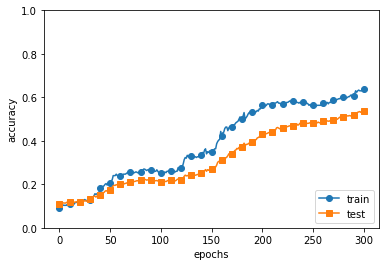

In [19]:
# dropout mnist 구분
x_train1 = x_train[:300]
t_train1 = t_train[:300]

use_dropout = True
dropout_ratio = 0.2

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], 
                              output_size=10, use_dropout=use_dropout, dropout_ratio=dropout_ratio)

trainer = Trainer(network, x_train1, t_train1, x_test, t_test,
                  epochs=301, mini_batch_size=100,
                  optimizer='sgd', optimizer_param={'lr': 0.01}, verbose=True)
trainer.train()

train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list

markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

# 5. 하이퍼파라미터 튜닝

### validation set 사용

In [15]:
def shuffle_dataset(x, t):

    permutation = np.random.permutation(x.shape[0])
    x = x[permutation,:] if x.ndim == 2 else x[permutation,:,:,:]
    t = t[permutation]

    return x, t

In [16]:
# 검증 데이터

# 훈련 데이터를 섞는다.
x_train1, t_train1 = shuffle_dataset(x_train, t_train)

# 20%를 검증 데이터로 분할
validation_rate = 0.20
validation_num = int(x_train1.shape[0] * validation_rate)

x_val = x_train1[ : validation_num]
t_val = t_train1[ : validation_num]
x_train1 = x_train1[validation_num : ]
t_train1 = t_train1[validation_num : ]


### 가중치 감소 계수(weight decay)와 학습율(learning rate) 최적화

In [17]:
weight_decay = 10 ** np.random.uniform(-8, -4)
lr = 10 ** np.random.uniform(-6, -2)

In [18]:
x_train1 = x_train[:500]
t_train1 = t_train[:500]

x_train1, t_train1 = shuffle_dataset(x_train1, t_train1)

validation_rate = 0.20
validation_num = int(x_train1.shape[0] * validation_rate)

x_val = x_train1[:validation_num]
t_val = t_train1[:validation_num]
x_train1 = x_train1[validation_num:]
t_train1 = t_train1[validation_num:]


def _train(lr, weight_decay, epocs=50):
    network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                            output_size=10, weight_decay_lambda=weight_decay)
    trainer = Trainer(network, x_train1, t_train1, x_val, t_val,
                      epochs=epocs, mini_batch_size=100,
                      optimizer='sgd', optimizer_param={'lr': lr}, verbose=False)
    trainer.train()

    return trainer.test_acc_list, trainer.train_acc_list


val acc: 0.15 | lr: 0.00017141527559857034, weight decay: 3.41811664616836e-07
val acc: 0.24 | lr: 0.0007812883644860651, weight decay: 4.966178903852022e-06
val acc: 0.09 | lr: 0.00022099842758508816, weight decay: 3.086038509693552e-05
val acc: 0.12 | lr: 6.081082982196915e-05, weight decay: 8.993123827386012e-05
val acc: 0.24 | lr: 0.0016746147792441287, weight decay: 4.369964100308754e-06
val acc: 0.21 | lr: 0.001985667970547441, weight decay: 3.1415509214282336e-05
val acc: 0.07 | lr: 3.932139591259257e-06, weight decay: 2.531109257517754e-06
val acc: 0.17 | lr: 1.3711262793505452e-05, weight decay: 1.6494348588721173e-07
val acc: 0.13 | lr: 0.0008455902140618512, weight decay: 8.766757219850942e-06
val acc: 0.1 | lr: 1.342700069370826e-06, weight decay: 1.2010776866875304e-07
val acc: 0.74 | lr: 0.00867248652952668, weight decay: 9.587281101335612e-05
val acc: 0.68 | lr: 0.006572434298803985, weight decay: 3.774544667814201e-08
val acc: 0.09 | lr: 1.3749056668897174e-06, weight d

Best-17(val acc:0.42) | lr:0.0032723358762749943, weight decay:5.20533261032745e-06
Best-18(val acc:0.36) | lr:0.0023015513731694534, weight decay:5.345114789756455e-05
Best-19(val acc:0.35) | lr:0.001462206066370242, weight decay:1.256894260564245e-07
Best-20(val acc:0.35) | lr:0.0017581385396144094, weight decay:6.033645337870484e-06


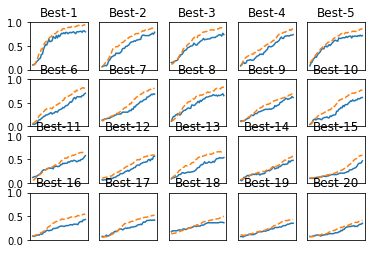

In [19]:
optimization_trial = 100
results_val = {}
results_train = {}

for _ in range(optimization_trial):
    weight_decay = 10 ** np.random.uniform(-8, -4)
    lr = 10 ** np.random.uniform(-6, -2)
    # ================================================
    val_acc_list, train_acc_list = _train(lr, weight_decay)
    print("val acc: {} | lr: {}, weight decay: {}".format(val_acc_list[-1], lr, weight_decay))
    key = "lr:" + str(lr) + ", weight decay:" + str(weight_decay)
    results_val[key] = val_acc_list
    results_train[key] = train_acc_list

print("=========== Hyper-Parameter Optimization Result ===========")
graph_draw_num = 20
col_num = 5
row_num = int(np.ceil(graph_draw_num / col_num))
i = 0

for key, val_acc_list in sorted(results_val.items(), key=lambda x:x[1][-1], reverse=True):
    print("Best-" + str(i+1) + "(val acc:" + str(val_acc_list[-1]) + ") | " + key)

    plt.subplot(row_num, col_num, i+1)
    plt.title("Best-" + str(i+1))
    plt.ylim(0.0, 1.0)
    if i % 5: plt.yticks([])
    plt.xticks([])
    x = np.arange(len(val_acc_list))
    plt.plot(x, val_acc_list)
    plt.plot(x, results_train[key], "--")
    i += 1

    if i >= graph_draw_num:
        break

plt.show()